<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 8: *Clustering***

###**Tenggat Waktu: 13 Desember 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 13 Desember 2024, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam. Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.

In [2]:
# Isi dengan data diri Anda
NAMA = "Irgi Muttaqin Fahrezi Situmorang"
KELAS = "C"
NPM = "2406385933"
USERNAME_KAGGLE = "irgimuttaqinfahrezi"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [3]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Irgi Muttaqin Fahrezi Situmorang dari kelas C dengan NPM 2406385933, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Irgi Muttaqin Fahrezi Situmorang)


## Import Library

In [5]:
pip install yellowbrick


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

## Intro to Clustering
Clustering merupakan bagian dari unsupervised learning. Proses yang dilakukan adalah mengelompokkan data points ke dalam beberapa grup/klaster. Harapannya adalah objek pada klaster yang sama akan memiliki similarity yang tinggi. Sebaliknya, objek yang berada di klaster berbeda akan memiliki similarity yang rendah. Berbeda dengan supervised learning yang datanya sudah memiliki label yang bersesuaian, algoritma clustering tidak secara eksplisit menjelaskan makna tiap klaster. Oleh karena itu, tiap-tiap klaster tersebut perlu diinterpretasikan sendiri.

Algoritma clustering yang akan digunakan untuk lab ini adalah **K-Means** dan **Hierarchical** atau Agglomerative clustering. Berikut adalah penjelasan singkat mengenai keduanya:
1) **K-Means** membagi data menjadi K kluster di mana setiap titik data termasuk dalam kluster dengan pusat yang terdekat. Tujuan utamanya adalah untuk mengurangi variasi dalam kluster dan memaksimalkan variasi antara kluster.
2) **Hierarchical Clustering** membangun hirarki kluster dengan menggabungkan atau membagi kluster dalam langkah-langkah yang berurutan. Ini menghasilkan pohon kluster yang dapat diwakili sebagai dendrogram, yang memungkinkan analisis tingkat hierarki.

Mari kita lihat penerapan clustering menggunakan Scikit-Learn.

### K-Means Clustering

**Penjelasan Dataset**

| Atribut              | Penjelasan                                |
|--------------------- |-------------------------------------------|
| marital_status | Status pernikahan |
| income               | Pendapatan tahunan (USD)        |
| num_store_purchases  | Jumlah pembelian melalui toko offline     |
> Dataset merupakan adaptasi dan modifikasi dari https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis dan Lab 9 KASDD Genap 22/23

In [7]:
# Load dataset
df = pd.read_csv('https://drive.google.com/uc?id=1CezmkPIZuLnpHVZutr5oYg8QSsZfPlv3')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,income,num_store_purchases,marital_status
0,58138.0,4,Single
1,46344.0,2,Single
2,71613.0,10,Together
3,26646.0,4,Together
4,58293.0,6,Married


In [8]:
print(f"Ukuran dataset: {df.shape}")

Ukuran dataset: (500, 3)


In [9]:
# Melihat informasi dasar dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   income               500 non-null    float64
 1   num_store_purchases  500 non-null    int64  
 2   marital_status       500 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 11.8+ KB


In [10]:
# Melihat deskripsi statistik dasar dari kolom
df.describe()

,income,num_store_purchases
count,500.000000,500.000000
mean,51387.664000,5.800000
std,21245.949246,3.306034
min,2447.000000,0.000000
25%,34284.000000,3.000000
50%,50898.000000,5.000000
75%,67320.000000,8.000000
max,157243.000000,13.000000


Pada tahap ini, kita bisa melakukan imputasi data yang kosong, menghilangkan duplikat, dan menghapus outlier. Namun, hal ini tidak perlu kita lakukan pada dataset ini karena dataset tersebut sudah bersih.

Hal yang perlu dilakukan selanjutnya adalah melakukan standarisasi dan encoding kolom kategorikal.

In [11]:
# Melakukan Standarisasi
from sklearn.preprocessing import StandardScaler

numerical_attributes = ['income', 'num_store_purchases']

df_std = pd.DataFrame(StandardScaler().fit_transform(df[numerical_attributes]), columns=numerical_attributes)
df_std['marital_status'] = df['marital_status']  # Membiarkan dulu atribut kategorikal
df_std.head()

,income,num_store_purchases,marital_status
0,0.318042,-0.545004,Single
1,-0.237632,-1.150565,Single
2,0.952915,1.271677,Together
3,-1.165702,-0.545004,Together
4,0.325344,0.060556,Married


In [12]:
# Melakukan Encoding
print(f"Jumlah label unik dari marital status: {df['marital_status'].nunique()}")
print(f"{df['marital_status'].unique()}\n")

Jumlah label unik dari marital status: 6
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone']



In [13]:
!pip install --upgrade category_encoders


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from category_encoders import OrdinalEncoder

marital_map =[{'col': 'marital_status',
             'mapping':{'Single': 1,
                        'Alone': 1,
                        'Together': 2,
                        'Married': 3,
                        'Divorced': 4,
                        'Widow': 5,}
            }]

enc2 = OrdinalEncoder(mapping=marital_map)
df_enc = enc2.fit_transform(df_std)

df_enc.head()

,income,num_store_purchases,marital_status
0,0.318042,-0.545004,1
1,-0.237632,-1.150565,1
2,0.952915,1.271677,2
3,-1.165702,-0.545004,2
4,0.325344,0.060556,3


**Persiapan Clustering**<br>
Selanjutnya, kita harus menentukan nilai K sebagai input dari algoritma K-means. **Silhouette Coefficient** merupakan salah satu metrik umum untuk mengevaluasi data yang tidak memiliki *true cluster*. Silhouette Coefficient menghitung rata-rata jarak intra-cluster dan minimum rata-rata jarak inter-cluster.


In [16]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Menghitung Silhouette Coeff
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
    cluster_labels = clusterer.fit_predict(df_enc)
    silhouette_avg = silhouette_score(df_enc, cluster_labels)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}")

Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.38807169772444033
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.3728268092814725
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.3666925447292704
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.3615470682224549


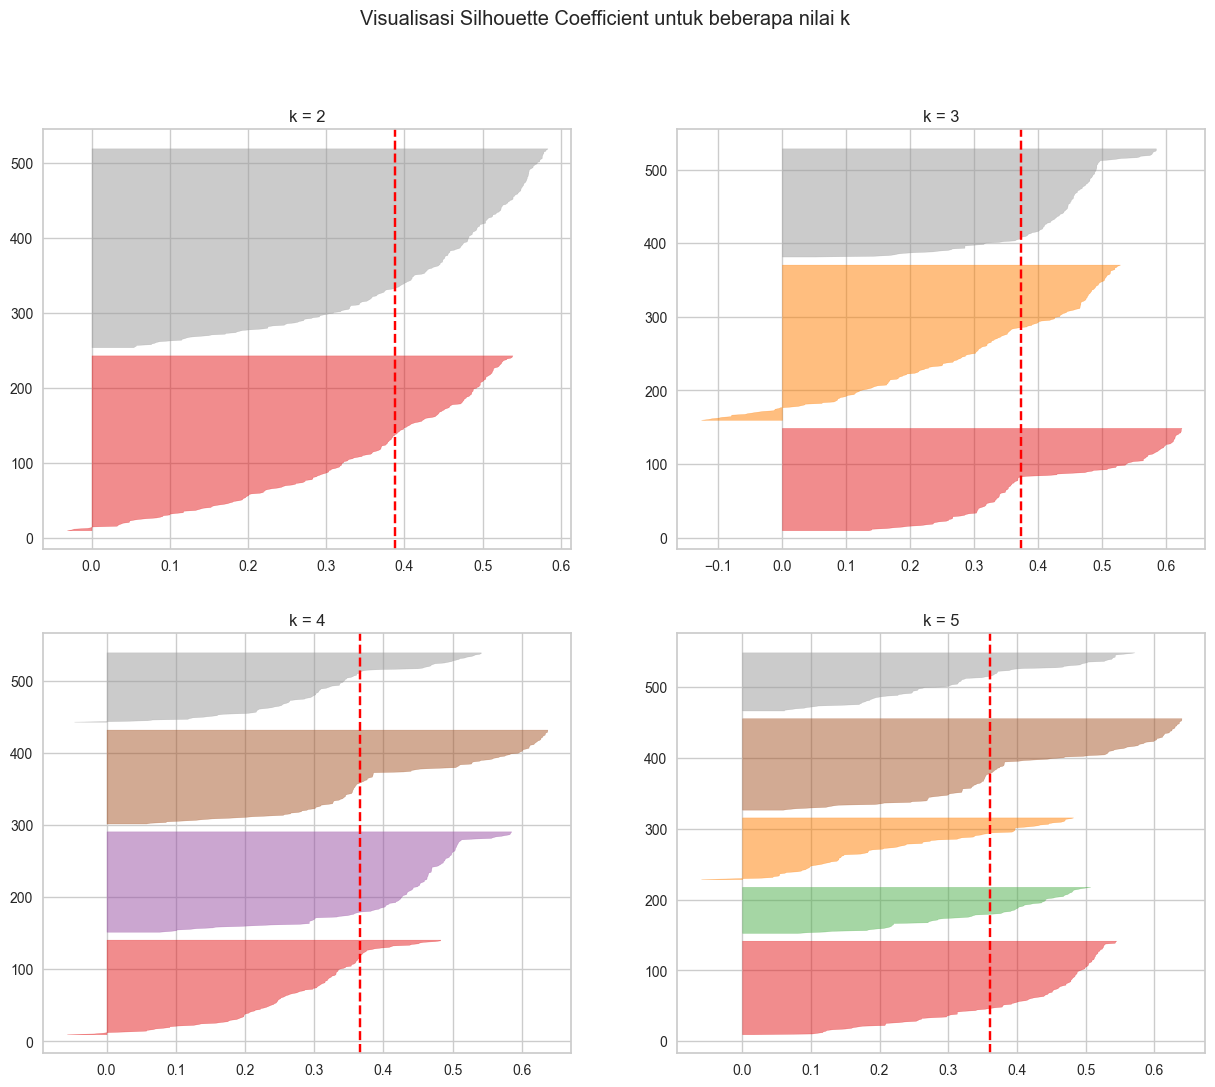

In [18]:
# Memvisualisasikan silhouette

fig, ax = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(df_enc)

**Metrik Pendukung**
Metrik lain yang juga menjadi acuan untuk menentukan jumlah klaster adalah **Elbow Method**. Cara kerjanya adalah menampilkan plot inersia di berbagai nilai k yang menunjukkan seberapa baik klaster yang dihasilkan terhadap datanya. Pada nilai k yang tepat, akan muncul suatu "inflection point" di mana terjadi perubahan drastis pada gradien kurva.

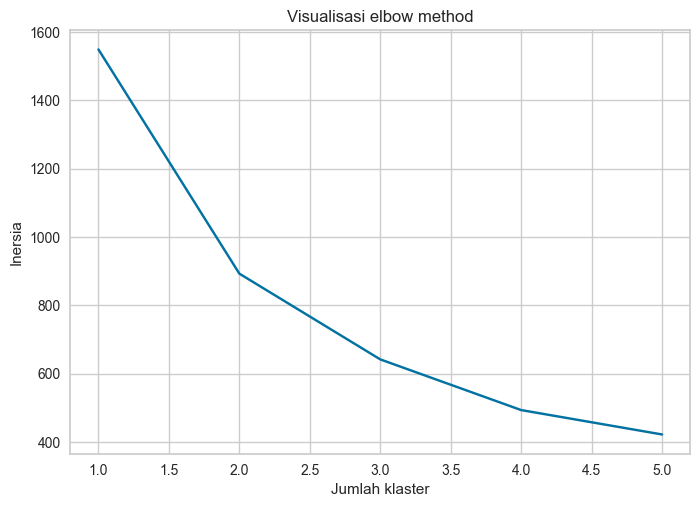

In [19]:
# Memvisualisasikan elbow method
inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster, n_init=10)
    km = km.fit(df_enc)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

Berdasarkan hasil metrik Silhouette Coeff. dan Elbow Method, data ini tidak menghasilkan klaster yang baik. Nilai $s(C)$ untuk `k = 2`, `k = 3`, `k = 4`, dan `k = 5` tidak jauh berbeda. Hal ini juga dibuktikan dari plot Elbow Method di atas: tidak ada inflection point yang perubahan gradiennya cukup drastis. Nilai K yang dipilih adalah `k = 2` karena nilai $s(C)$ untuk `k = 2` merupakan yang paling tinggi. Selain itu, perubahan gradien inersia di sebelah kiri `k = 2` paling drastis di antara keempat kandidat klaster

**Train Model**<br>
Latih model KMeans dengan memilih parameter cluster berdasarkan nilai k yang dipilih.

In [20]:
# Latih model sesuai jumlah klaster optimal
kmeans = KMeans(n_clusters=2, n_init=10)
assignment = kmeans.fit_predict(df_enc)

In [21]:
# Append hasil clustering ke dataframe
df_with_clusters = pd.DataFrame(df_enc.copy())
df_with_clusters['cluster'] = assignment
df_with_clusters.head()

,income,num_store_purchases,marital_status,cluster
0,0.318042,-0.545004,1,0
1,-0.237632,-1.150565,1,0
2,0.952915,1.271677,2,1
3,-1.165702,-0.545004,2,0
4,0.325344,0.060556,3,1


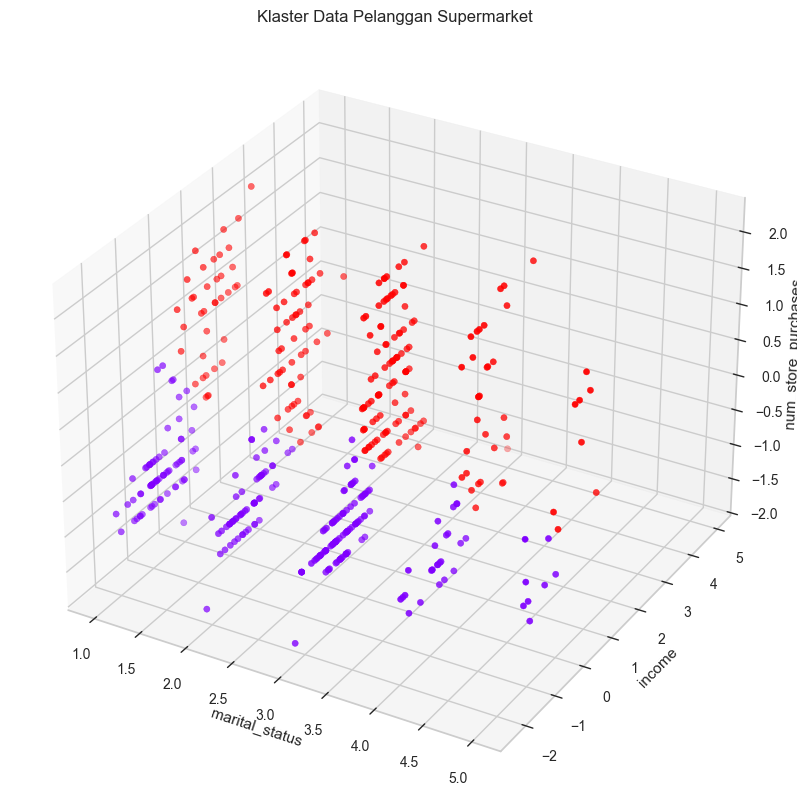

In [22]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters['marital_status']
y = df_with_clusters['income']
z = df_with_clusters['num_store_purchases']
cluster = df_with_clusters['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel('marital_status')
ax.set_ylabel('income')
ax.set_zlabel('num_store_purchases')

plt.show()

> **Contoh interpretasi hasil**: Pada tiap kelas `marital_status` terdapat kedua jenis cluster, sehingga kelas `marital_status` tidak menentukan clustering secara signifikan. Di sisi lain, pola yang terlihat adalah cluster ungu selalu berada di kiri cluster merah. Ini menandakan bahwa atribut `income` merupakan pemisah utama. Cluster merah juga memiliki `num_store_purchases` yang lebih merata dibandingkan cluster ungu yang kebanyakan di bawah.

### Hierarchical (Agglomerative) Clustering
Berbeda dengan KMeans yang menentukan jumlah klaster kemudian mengevaluasinya, Agglomerative clustering mencari garis vertikal terpanjang yang menunjukkan pemisahan yang baik antara klaster yang terbentuk. Sebelum mengembangkan model untuk memprediksi klaster dari data, langkah pertama adalah menentukan jumlah klaster optimal berdasarkan visualisasi dendrogram.

Kita akan menggunakan dataset yang sama (`df_enc`) untuk pembuatan clustering hierarchical ini.

In [23]:
# Membuat model sementara untuk divisualisasikan
agglomerative  = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cluster_assignment = agglomerative.fit(df_enc)

# Menampilkan label klaster tiap data points
cluster_assignment.labels_

array([307, 438, 499, 260, 342, 429, 367, 305, 497, 323, 310, 496, 357,
       421, 387, 295, 341, 493, 253, 451, 414, 495, 287, 435, 447, 266,
       368, 315, 280, 345, 351, 490, 316, 352, 296, 330, 376, 303, 349,
       445, 489, 401, 482, 249, 453, 491, 247, 263, 284, 293, 275, 257,
       297, 407, 424, 391, 397, 392, 462, 309, 255, 432, 365, 369, 317,
       418, 325, 413, 420, 422, 354, 416, 439, 476, 463, 264, 277, 466,
       443, 360, 436, 372, 474, 340, 302, 460, 409, 477, 398, 427, 198,
       175, 483, 390, 444, 492, 379, 262, 488, 380, 370, 389, 294, 465,
       415, 374, 411, 343, 478, 346, 431, 333, 417, 259, 450, 271, 308,
       258, 327, 467, 366, 322, 378, 400, 291, 388, 232, 468, 487, 375,
       383, 425, 441, 254, 464, 210, 326, 452, 217, 381, 384, 486, 243,
       162, 412, 290, 471, 475, 498, 406, 300, 473, 328, 157, 481, 449,
       371, 324, 225, 289, 184, 386, 183, 244, 448, 428, 359, 278, 399,
       306, 182, 238, 131, 298, 461, 208, 265, 240, 470, 394, 18

In [24]:
# Fungsi untuk menampilkan dendogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

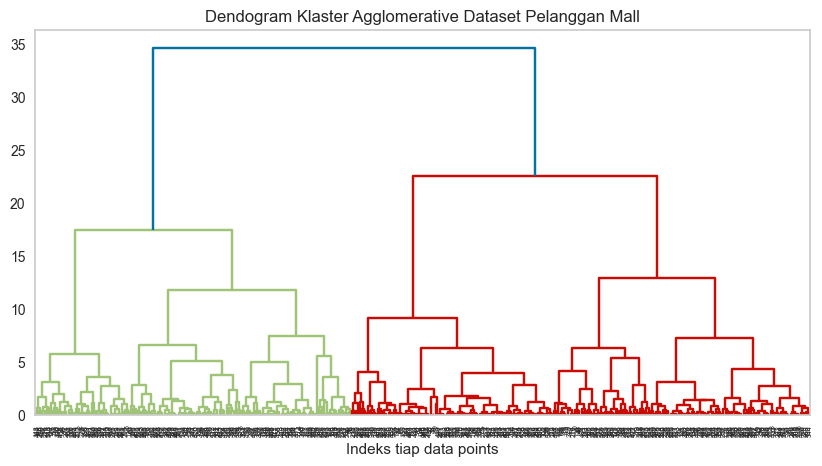

In [25]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Pelanggan Mall")
plt.xlabel("Indeks tiap data points")
plt.show()

Secara rule-of-thumb, garis biru merupakan jumlah k yang optimal. Namun, berdasarkan dendogram yang dibentuk, data ini tidak menghasilkan klaster yang baik: panjang garis biru dan merah sebenarnya tidak jauh berbeda. Idealnya, garis biru akan jauh lebih panjang daripada garis-garis lainnya dan kita akan lebih mudah membuat batas threshold seperti di bawah ini.

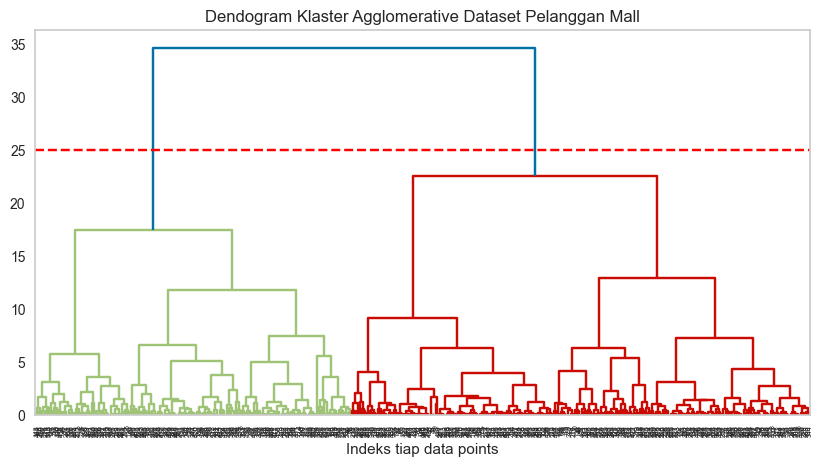

In [26]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Pelanggan Mall")
plt.xlabel("Indeks tiap data points")
plt.axhline(y = 25, color = 'red', linestyle = 'dashed')
plt.show()

Selanjutnya, kita bisa membuat model Agglomerative Clustering dengan nilai k yang didapatkan sebelumnya. Setelah itu, visualisasikan hasil modelnya.

In [27]:
# Definisikan model dengan hasil visualisasi sebelumnya
agglomerative = AgglomerativeClustering(n_clusters=2)
cluster_assignment2 = agglomerative.fit_predict(df_enc)

In [28]:
# Append hasil clustering ke dataframe
df_with_clusters_agg = pd.DataFrame(df_enc.copy())
df_with_clusters_agg['cluster'] = cluster_assignment2
df_with_clusters_agg.head()

,income,num_store_purchases,marital_status,cluster
0,0.318042,-0.545004,1,0
1,-0.237632,-1.150565,1,0
2,0.952915,1.271677,2,1
3,-1.165702,-0.545004,2,0
4,0.325344,0.060556,3,1


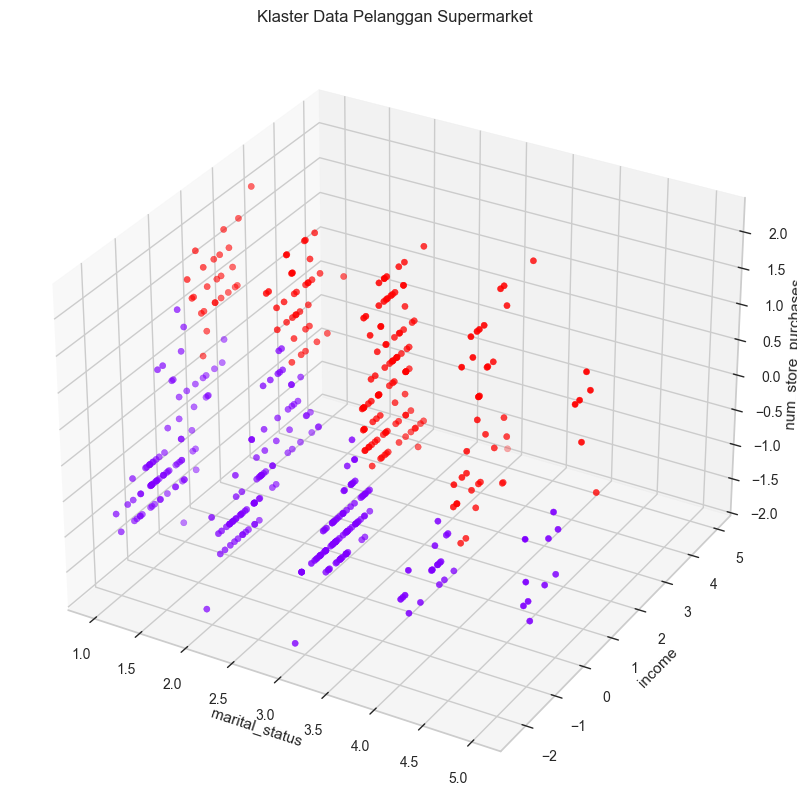

In [29]:
# Melakukan visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

x = df_with_clusters_agg['marital_status']
y = df_with_clusters_agg['income']
z = df_with_clusters_agg['num_store_purchases']
cluster = df_with_clusters_agg['cluster']

ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel('marital_status')
ax.set_ylabel('income')
ax.set_zlabel('num_store_purchases')

plt.show()

# Latihan

In [223]:
# JANGAN UBAH INI
dataset = {
  0: "1lmnrwIuAzfviuDGjspPlg-k3axo6rwRZ",
  1: "1atkXgeUP8DG0g_218-4mFFBRaElQuEb1"
}

def get_dataset():
  try:
    code_dataset = int(NPM) % 2
    df = pd.read_csv(f'https://drive.google.com/uc?id={dataset[code_dataset]}')

    return df
  except:
    return pd.DataFrame()

In [224]:
df = get_dataset()

In [225]:
if 'CustomerID' in df.columns:
    df = df.drop(['CustomerID'], axis=1)
if 'Order ID' in df.columns:
    df = df.drop(['Order ID'], axis=1)
if 'Customer ID' in df.columns:
    df = df.drop(['Customer ID'], axis=1)
if 'Customer Name' in df.columns:
    df = df.drop(['Customer Name'], axis=1)
if 'Product ID' in df.columns:
    df = df.drop(['Product ID'], axis=1)
if 'Product Name' in df.columns:
    df = df.drop(['Product Name'], axis=1)
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


## Preprocess Dataset

Pada tahap preprocessing dataset, persiapan yang dilakukan setidaknya perlu melakukan hal berikut:

1. Mengecek dan menangani missing values
2. Mengecek dan menangani data duplikat
3. Menangani outlier
4. Melakukan standarisasi
5. Melakukan encoding pada atribut kategorikal

Wajib untuk mencantumkan sumber terkait








> **Lakukan preprocessing dataset dengan melakukan minimal 5 persiapan diatas beserta alasannya dan cantumkan sumber terkait**



### Pengananan Missing Value (beserta alasannya)

In [226]:
from sklearn.impute import KNNImputer
import pandas as pd

# Mengecek missing values sebelum penanganan
missing_values = df.isnull().sum()
print("Missing values sebelum penanganan:\n", missing_values)

# Memisahkan kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Inisialisasi KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")  # n_neighbors adalah jumlah tetangga terdekat

# Hanya mengimputasi kolom numerik
df[numerical_columns] = knn_imputer.fit_transform(df[numerical_columns])

# Mengecek missing values setelah penanganan
missing_values_after = df.isnull().sum()
print("\nMissing values setelah penanganan:\n", missing_values_after)

# Pastikan tidak ada missing values yang tersisa
assert missing_values_after.sum() == 0, "Terdapat missing values yang belum teratasi!"


Missing values sebelum penanganan:
 Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Missing values setelah penanganan:
 Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp    

### Penanganan Missing Values

#### 1. **Mengecek Missing Values**
Sebelum menangani missing values, kita terlebih dahulu memeriksa jumlah missing values di setiap kolom dataset. Hal ini penting untuk mengetahui seberapa banyak data yang hilang dan kolom mana yang perlu diperbaiki.

#### 2. **Menangani Missing Values pada Kolom Numerikal**
### Alasan Menggunakan KNNImputer untuk Missing Values

1. **Data-Driven**: 
   - KNNImputer mengisi nilai yang hilang dengan mempertimbangkan hubungan antar data, sehingga lebih informatif dibanding menggunakan rata-rata atau median secara langsung.

2. **Kesesuaian pada Dataset**: 
   - Cocok untuk dataset dengan fitur numerik yang memiliki pola atau keterkaitan antar fitur.

3. **Fleksibilitas**:
   - Parameter seperti `n_neighbors` memungkinkan kita menyesuaikan jumlah tetangga yang digunakan, sehingga hasilnya bisa lebih relevan dengan pola dalam data.

4. **Bobot Tetangga**:
   - Opsi untuk memberikan bobot berdasarkan jarak (`weights='distance'`) meningkatkan akurasi imputasi dengan mempertimbangkan relevansi tetangga yang lebih dekat.

5. **Tidak Mengabaikan Informasi**:
   - Alih-alih menggantikan nilai hilang secara konstan (median/modus), KNNImputer memanfaatkan distribusi nilai tetangga, menjaga struktur alami dataset.

#### 3. **Menangani Missing Values pada Kolom Kategorikal**
Untuk kolom kategorikal (misalnya, `Gender`, `MaritalStatus`, dll), kita mengisi nilai yang hilang dengan **modus**. Mengapa modus?
- Modus adalah nilai yang paling sering muncul dan menggantikan missing value dengan kategori yang paling umum.
- Ini menjaga distribusi kategori dan menghindari pengaruh besar pada pola data.

#### 4. **Mengecek Setelah Penanganan**
Setelah melakukan perbaikan, kita memeriksa kembali dataset untuk memastikan tidak ada nilai yang hilang. Jika sudah tidak ada, maka data siap untuk langkah preprocessing selanjutnya.

**Hasil Sebelum dan Setelah Penanganan Missing Values:**

- Sebelum: Semua kolom memiliki missing values.
- Setelah: Tidak ada missing values pada semua kolom.

### Pengananan Data Duplikat (beserta alasannya)

In [227]:
# Mengecek data duplikat
duplicate_rows = df.duplicated().sum()

# Menampilkan data duplikat
print(f"Jumlah duplikat sebelum penanganan: {duplicate_rows}")

# Menghapus duplikat
df.drop_duplicates(inplace=True)

# Mengecek data duplikat setelah penghapusan
duplicate_rows_after = df.duplicated().sum()
print(f"Jumlah duplikat setelah penanganan: {duplicate_rows_after}")


Jumlah duplikat sebelum penanganan: 556
Jumlah duplikat setelah penanganan: 0


### Penanganan Data Duplikat

Pada tahap preprocessing, sangat penting untuk memeriksa dan menangani data duplikat. Data duplikat dapat memberikan bias pada analisis dan model yang akan dibangun, karena akan membuat data seolah-olah lebih banyak dari yang sebenarnya.

#### 1. **Mengecek Data Duplikat**
Langkah pertama adalah mengecek apakah ada baris yang terduplikasi. Fungsi `duplicated()` digunakan untuk mengidentifikasi duplikasi dalam dataset. Fungsi ini akan mengembalikan `True` untuk baris yang duplikat dan `False` untuk yang unik.

#### 2. **Menghapus Data Duplikat**
Setelah kita mengidentifikasi duplikasi, langkah selanjutnya adalah menghapus data duplikat menggunakan `drop_duplicates()`. Mengapa menghapus data duplikat?
- Data yang duplikat dapat mengarah pada overfitting dalam model, karena model akan menganggap data yang duplikat lebih penting.
- Menghilangkan data duplikat membuat dataset lebih representatif terhadap populasi asli.

#### 3. **Mengecek Setelah Penghapusan**
Setelah menghapus duplikat, kita memeriksa kembali untuk memastikan bahwa tidak ada data duplikat yang tersisa. Jika jumlah duplikat setelah penghapusan adalah 0, berarti kita telah berhasil menghilangkan semua duplikasi.

**Hasil Sebelum dan Setelah Penanganan Duplikat:**

- Sebelum: Dataset memiliki beberapa data duplikat.
- Setelah: Semua data duplikat berhasil dihapus.

### Pengananan outlier (beserta alasannya)

In [206]:
# Cek tipe data tiap kolom
print(df.dtypes)



Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object


In [228]:
# Menampilkan gambaran data sebelum penanganan outlier
print("Sebelum penanganan outlier:")
print(df[numerical_columns].describe())

# Menangani outlier dengan IQR (Interquartile Range)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan nilai batas bawah atau atas
df_cleaned = df.copy()

for column in numerical_columns:
    df_cleaned[column] = df[column].apply(lambda x: upper_bound[column] if x > upper_bound[column] else 
                                          (lower_bound[column] if x < lower_bound[column] else x))

# Menampilkan gambaran data setelah penanganan outlier
print("\nSetelah penanganan outlier:")
print(df_cleaned[numerical_columns].describe())


Sebelum penanganan outlier:
             Churn       Tenure     CityTier  WarehouseToHome  HourSpendOnApp  \
count  5074.000000  5074.000000  5074.000000      5074.000000     5074.000000   
mean      0.165747    10.022467     1.658455        15.578006        2.910918   
std       0.371890     8.493069     0.919284         8.481352        0.713870   
min       0.000000     0.000000     1.000000         5.000000        0.000000   
25%       0.000000     2.000000     1.000000         9.000000        2.000000   
50%       0.000000     8.400000     1.000000        14.000000        3.000000   
75%       0.000000    15.000000     3.000000        20.000000        3.000000   
max       1.000000    61.000000     3.000000       127.000000        5.000000   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
count               5074.000000        5074.000000      5074.000000   
mean                   3.686244           3.027986         4.194521   
std                    1.0296

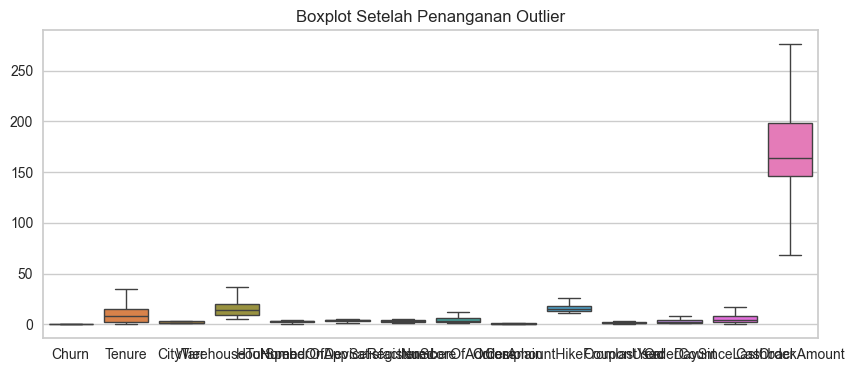

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi boxplot untuk kolom numerik setelah penanganan outlier
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_cleaned[numerical_columns])
plt.title("Boxplot Setelah Penanganan Outlier")
plt.show()


### Penanganan Outlier

Outlier adalah nilai yang sangat berbeda dari sebagian besar data dalam dataset dan dapat mengganggu analisis serta hasil model. Untuk menangani outlier, kita menggunakan metode **Interquartile Range (IQR)**.

#### Langkah-langkah Penanganan:
1. **Menghitung IQR**: IQR adalah selisih antara kuartil pertama (Q1) dan kuartil ketiga (Q3). Formula IQR adalah:
   - **IQR = Q3 - Q1**
   
2. **Menentukan Batas Outlier**:
   - Batas bawah: **Q1 - 1.5 * IQR**
   - Batas atas: **Q3 + 1.5 * IQR**

   Data yang berada di luar batas bawah atau atas dianggap sebagai outlier.

3. **Menghapus Outlier**: Data yang berada di luar batas ini dihapus agar distribusi data lebih stabil dan tidak terdistorsi oleh nilai ekstrim.

#### Alasan Menggunakan IQR:
- **IQR** adalah salah satu metode yang paling umum dan mudah dipahami untuk mendeteksi outlier. 
- Dengan menghapus outlier, model kita akan lebih akurat karena tidak dipengaruhi oleh data yang sangat tidak biasa atau ekstrem.
- IQR efektif digunakan ketika data tidak memiliki distribusi yang sangat miring (skewed), serta tidak mengasumsikan distribusi data tertentu (berbeda dengan z-score yang mengasumsikan distribusi normal).


### Pengananan standarisasi (beserta alasannya)

In [230]:
from sklearn.preprocessing import MinMaxScaler

# Pilih semua kolom numerik dalam DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan MinMaxScaler pada semua kolom numerik
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Menampilkan beberapa baris pertama untuk melihat hasil standarisasi
print("Kolom numerik setelah Min-Max Scaling:\n", df[numerical_columns].head())


Kolom numerik setelah Min-Max Scaling:
    Churn    Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0    1.0  0.065574       1.0         0.008197            0.60   
1    1.0  0.163934       0.0         0.024590            0.60   
2    1.0  0.104918       0.0         0.204918            0.40   
3    1.0  0.000000       1.0         0.081967            0.40   
4    1.0  0.000000       0.0         0.057377            0.48   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                       0.4               0.25         0.380952       1.0   
1                       0.6               0.50         0.285714       1.0   
2                       0.6               0.50         0.238095       1.0   
3                       0.6               1.00         0.333333       0.0   
4                       0.4               1.00         0.095238       0.0   

   OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                     0.00000

### Alasan Penggunaan Min-Max Scaling untuk Standarisasi Data Numerik

**Min-Max Scaling** adalah teknik transformasi yang mengubah data ke dalam rentang nilai yang konsisten, biasanya antara 0 dan 1. Teknik ini cocok digunakan ketika kita ingin memastikan bahwa semua fitur berada dalam skala yang sama, terutama ketika algoritma yang digunakan sensitif terhadap skala data (seperti algoritma berbasis jarak).

Berikut alasan penggunaan **Min-Max Scaling** pada kolom tertentu dalam dataset ini:

1. **Tenure, WarehouseToHome, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount**:
   - Kolom-kolom ini adalah **variabel numerik** yang memiliki rentang nilai yang berbeda-beda dan memerlukan standarisasi agar tidak mempengaruhi hasil analisis, terutama jika digunakan untuk algoritma seperti K-Means atau algoritma berbasis jarak lainnya.
   - **Min-Max Scaling** memudahkan kita untuk mengubah rentang nilai ke dalam skala yang lebih kecil dan lebih mudah diinterpretasi (misalnya, antara 0 dan 1), yang dapat meningkatkan kinerja model yang sensitif terhadap skala fitur.

2. **Churn, CityTier, HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore, Complain**:
   - **Churn** adalah kolom yang berisi data kategori (1 atau 2), yang sudah dalam format numerik dan tidak membutuhkan normalisasi.
   - **CityTier** adalah kolom kategorikal yang menunjukkan level kota dan tidak perlu distandarisasi karena sudah berupa data kategori yang terpisah.
   - **HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore, Complain** adalah fitur yang memiliki rentang nilai yang lebih terstruktur dan sudah berada dalam format yang sesuai untuk analisis (misalnya, waktu pengunaan aplikasi dalam satuan jam, jumlah perangkat terdaftar, tingkat kepuasan, dan keluhan yang terhitung dalam kategori).

### Kesimpulan:
- **Min-Max Scaling** digunakan hanya pada kolom numerik yang rentang nilainya besar dan perlu distandarisasi untuk memastikan keseragaman skala antar fitur, yang penting dalam algoritma berbasis jarak atau saat kita ingin membandingkan fitur secara lebih adil.
- Kolom kategorikal seperti **Churn** dan **CityTier** tidak perlu distandarisasi karena nilai-nilai tersebut sudah dalam format yang cocok untuk analisis kategorikal atau label encoding.

### Pengananan encoding pada atribut kategorikal (beserta alasannya)

In [231]:
from sklearn.preprocessing import LabelEncoder

# Pilih kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

# Inisialisasi LabelEncoder
encoder = LabelEncoder()

# Encode kolom kategorikal langsung di dalam DataFrame
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

# Menampilkan beberapa baris pertama untuk melihat hasil encoding
df.head()


,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1.0,0.065574,1,1.0,0.008197,4,0,0.60,0.4,2,0.25,2,0.380952,1.0,0.000000,0.0625,0.0,0.108696,0.492107
1,1.0,0.163934,2,0.0,0.024590,6,1,0.60,0.6,3,0.50,2,0.285714,1.0,0.266667,0.0000,0.0,0.000000,0.372011
2,1.0,0.104918,2,0.0,0.204918,4,1,0.40,0.6,3,0.50,2,0.238095,1.0,0.200000,0.0000,0.0,0.065217,0.370104
3,1.0,0.000000,2,1.0,0.081967,4,1,0.40,0.6,2,1.00,2,0.333333,0.0,0.800000,0.0000,0.0,0.065217,0.412536
4,1.0,0.000000,2,0.0,0.057377,0,1,0.48,0.4,3,1.00,2,0.095238,0.0,0.000000,0.0625,0.0,0.065217,0.398782


### Penanganan Encoding pada Atribut Kategorikal dengan Label Encoding

Pada dataset ini, atribut kategorikal seperti `PreferredLoginDevice`, `PreferredPaymentMode`, dan `Gender` dapat dikonversi menggunakan **Label Encoding**. Label Encoding mengubah setiap kategori dalam kolom menjadi angka integer, sehingga memungkinkan model untuk mengolahnya sebagai data numerik.

**Alasan penggunaan Label Encoding pada dataset ini**:
- **Efisien**: Mengonversi data kategorikal menjadi angka tanpa menambah kolom baru, yang menjaga struktur data tetap kompak.
- **Cocok untuk kategori nominal**: Kolom seperti `Gender` dan `PreferredLoginDevice` berisi kategori yang tidak memiliki urutan, tetapi Label Encoding tetap dapat digunakan untuk menggantikan nilai kategorikal dengan angka.
- **Mempermudah penggunaan dalam model**: Kategori yang telah diubah menjadi angka bisa langsung digunakan oleh model pembelajaran mesin.


In [ ]:
# Tambahkan tahap preprocessing lainnya jika diperlukan

## Pemilihan fitur

Buatlah dataset baru yang hanya memiliki fitur (kolom) pilihan. Pilih setidaknya 3 fitur, mencakup fitur numerik dan kategorikal, dan jelaskan alasan pemilihan fitur tersebut. Dataset ini akan digunakan untuk melakukan clustering

In [232]:
# Pilih fitur yang sudah ditentukan
selected_features = ['Gender', 'Churn', 'HourSpendOnApp']

# Membuat dataset baru dengan fitur pilihan
df_selected = df[selected_features]

# Menampilkan beberapa baris pertama dataset terpilih
df_selected.head()


,Gender,Churn,HourSpendOnApp
0,0,1.0,0.60
1,1,1.0,0.60
2,1,1.0,0.40
3,1,1.0,0.40
4,1,1.0,0.48


## K-Means Clustering

### a) Hitung dan visualisasikan nilai Silhouette Coefficient untuk dataset baru yang telah dibuat pada poin (a). Berikan interpretasi hasilnya

Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.6683143759684811
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.7886803189116339
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.8550465734163668
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.8146257172802364

Nilai k terbaik berdasarkan Silhouette Coefficient adalah k = 4 dengan nilai silhouette = 0.8550465734163668


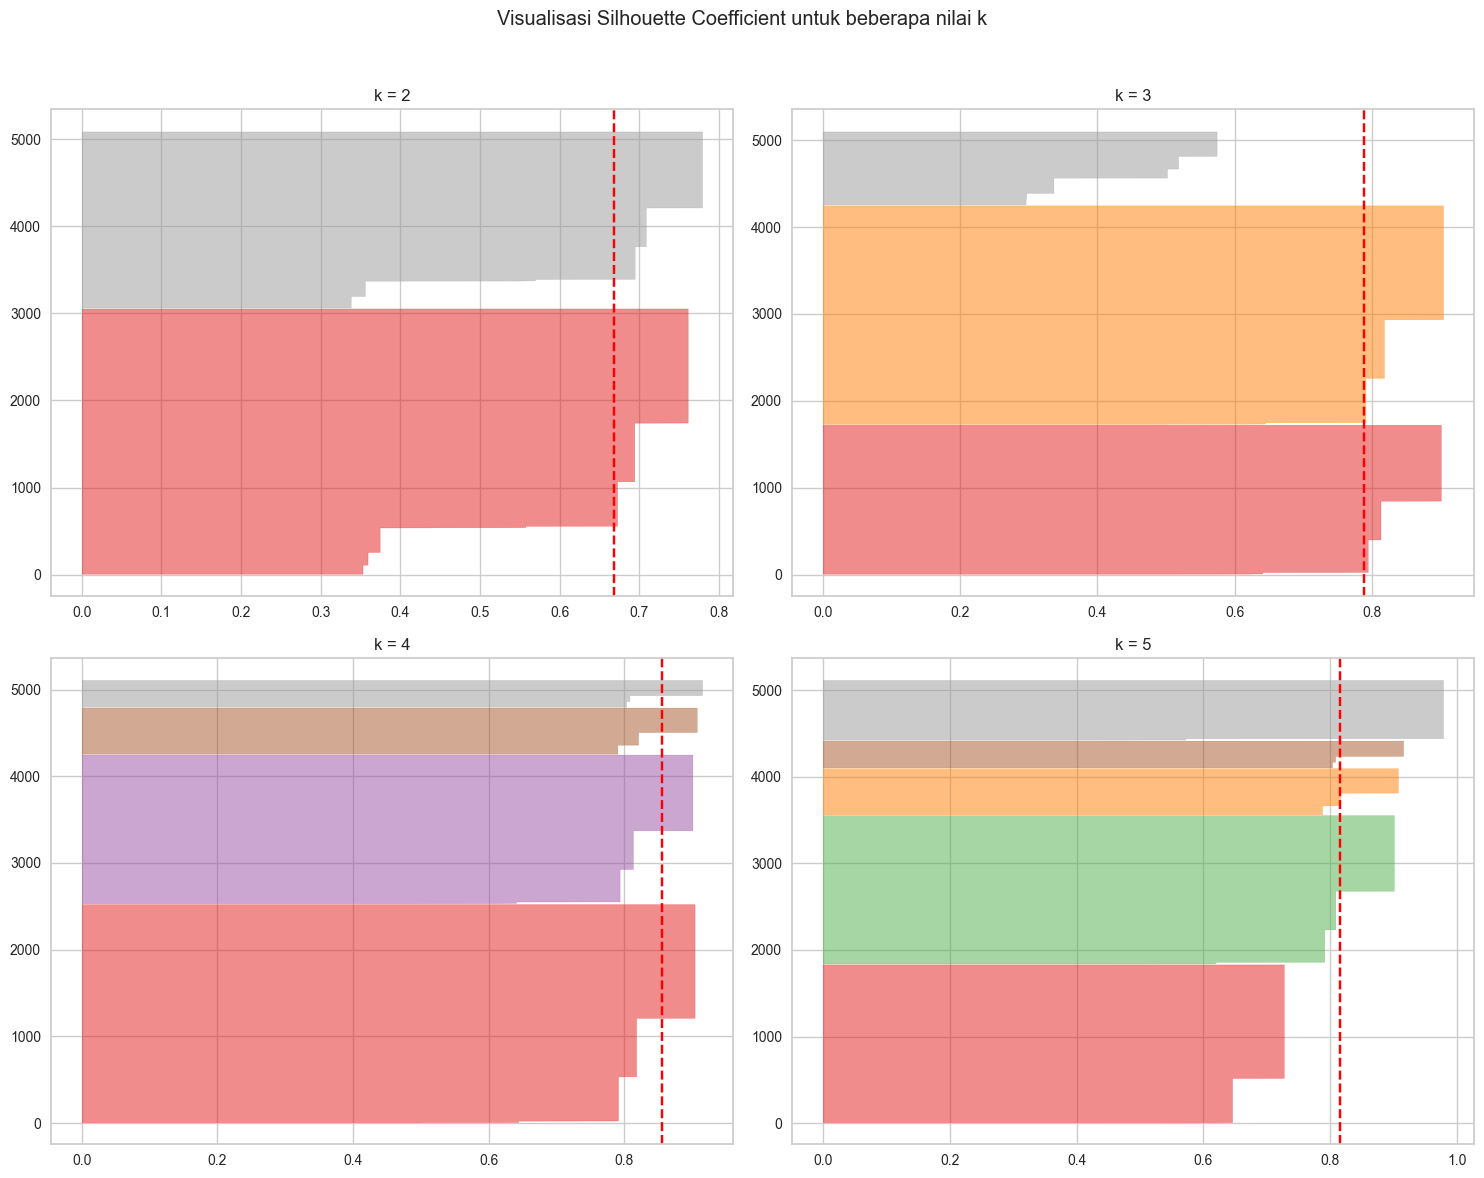

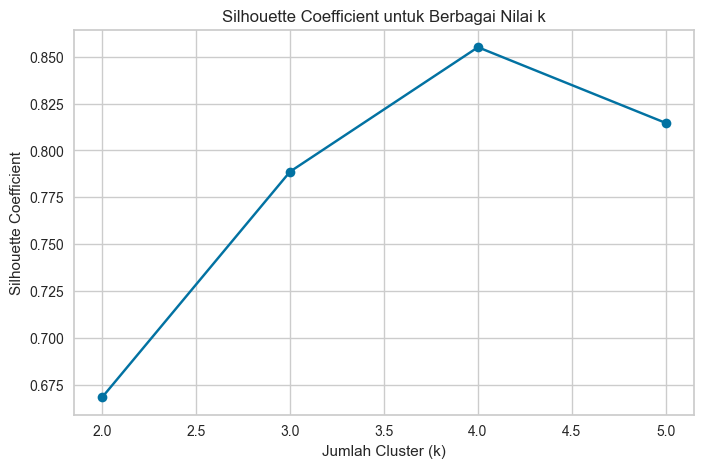

In [211]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

# Rentang nilai k yang akan dievaluasi
k_values = [2, 3, 4, 5]

# Variabel untuk menyimpan nilai silhouette terbaik dan k terbaik
best_k = None
best_silhouette = -1
silhouette_scores = []

# Menghitung dan menampilkan Silhouette Coefficient untuk setiap k
for k in k_values:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)
    
    # Mendapatkan label cluster dan menghitung silhouette score
    cluster_labels = clusterer.fit_predict(df_selected)
    silhouette_avg = silhouette_score(df_selected, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}")
    
    # Menyimpan nilai k terbaik berdasarkan silhouette score
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k

print(f"\nNilai k terbaik berdasarkan Silhouette Coefficient adalah k = {best_k} dengan nilai silhouette = {best_silhouette}")

# Visualisasi silhouette untuk semua nilai k
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")

for i, k in enumerate(k_values):
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)
    
    # Mendapatkan baris dan kolom untuk subplot
    row, col = divmod(i, 2)
    
    # Memvisualisasikan silhouette untuk model KMeans dengan k clusters
    ax[row][col].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax=ax[row][col])
    visualizer.fit(df_selected)

# Menyesuaikan layout agar plot tidak tumpang tindih
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Menampilkan hasil nilai silhouette untuk setiap k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='b')
plt.title("Silhouette Coefficient untuk Berbagai Nilai k")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Coefficient")
plt.grid(True)
plt.show()


In [163]:
# Mengecek missing values sebelum penanganan
print("Jumlah missing values sebelum penanganan:")
print(df.isnull().sum())

Jumlah missing values sebelum penanganan:
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


### b) Tampilkan visualisasi elbow method dengan suatu rentang nilai k (bisa berbeda)

In [174]:
pip install kneed


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


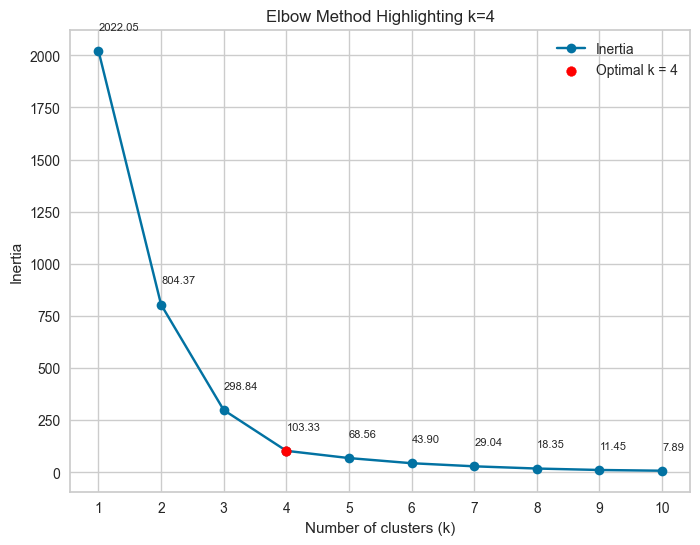

Inertia untuk setiap k: [2022.0544696886159, 804.374453811214, 298.8396960780923, 103.33251754797291, 68.55629614823508, 43.89595516770159, 29.035724761484694, 18.353447269673197, 11.450094188401698, 7.89199930683745]
Titik infleksi yang dipilih di k = 4 dengan inertia = 103.33


In [236]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Menentukan rentang nilai k (misalnya 1 hingga 10)
k_range = range(1, 11)

# Menyimpan nilai inertia untuk setiap nilai k
inertia = []

# Melakukan K-Means untuk setiap nilai k
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_selected)  # Pastikan menggunakan dataset yang sudah dipilih
    inertia.append(kmeans.inertia_)

# Menentukan k optimal (k = 4 dalam hal ini)
optimal_k = 4
optimal_inertia = inertia[optimal_k - 1]  # Mendapatkan nilai inertia di k optimal

# Membuat plot elbow dengan informasi kuantitatif
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b', label='Inertia')
plt.scatter(optimal_k, optimal_inertia, color='red', label=f'Optimal k = {optimal_k}', zorder=5)
plt.title('Elbow Method Highlighting k=4')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)

# Menambahkan anotasi untuk nilai inertia pada setiap titik
for k, value in zip(k_range, inertia):
    plt.annotate(f"{value:.2f}", xy=(k, value), xytext=(k, value + 100), fontsize=8)

plt.legend()
plt.show()

# Menampilkan hasil perhitungan
print(f"Inertia untuk setiap k: {inertia}")
print(f"Titik infleksi yang dipilih di k = {optimal_k} dengan inertia = {optimal_inertia:.2f}")


### c) Pilih k yang optimal berdasarkan hasil Silhouette Coefficient dan elbow method

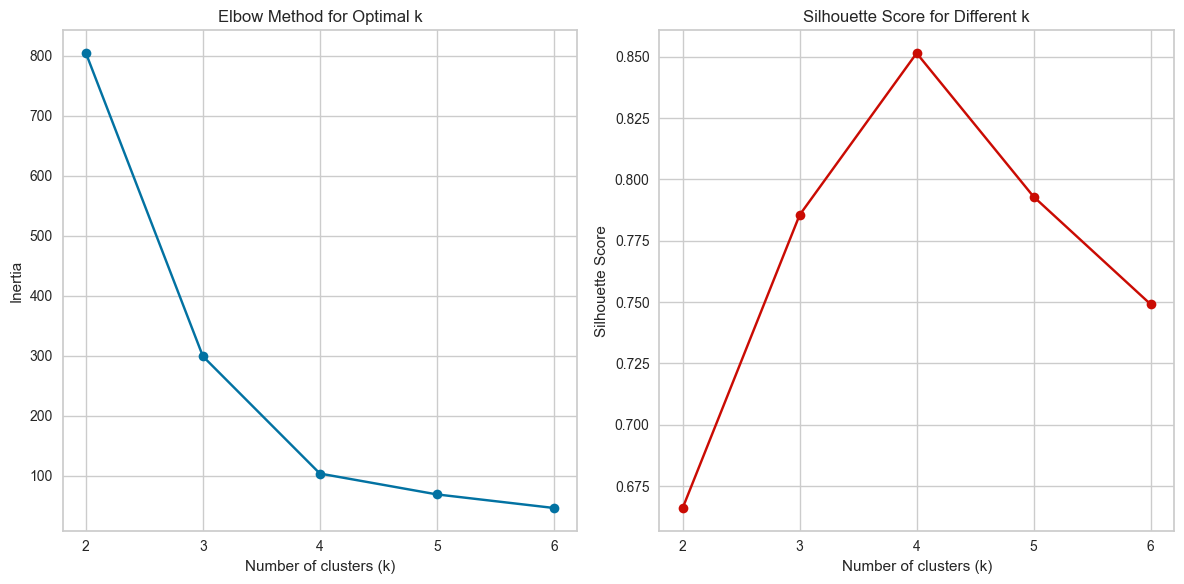

Silhouette score untuk k = 2: 0.6661
Silhouette score untuk k = 3: 0.7855
Silhouette score untuk k = 4: 0.8514
Silhouette score untuk k = 5: 0.7929
Silhouette score untuk k = 6: 0.7491

Berdasarkan Elbow Method, k yang optimal adalah: 4
Berdasarkan Silhouette Coefficient, k yang optimal adalah: 4


In [238]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Menentukan rentang nilai k (misalnya dari 2 hingga 6 untuk kedua metode)
k_range = range(2, 7)

# Menyimpan nilai inertia dan silhouette score untuk setiap nilai k
inertia = []
silhouette_scores = []

# Menyimpan hasil klastering untuk visualisasi
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    cluster_labels = kmeans.fit_predict(df_selected)
    
    # Menghitung inertia (untuk elbow method)
    inertia.append(kmeans.inertia_)
    
    # Menghitung Silhouette Coefficient
    silhouette_avg = silhouette_score(df_selected, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 1. Visualisasi Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)

# 2. Visualisasi Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()

# Menampilkan nilai Silhouette untuk setiap k
for k, score in zip(k_range, silhouette_scores):
    print(f"Silhouette score untuk k = {k}: {score:.4f}")

# Memilih k yang optimal berdasarkan kedua metode
optimal_k_elbow = 4  # Misalnya, berdasarkan elbow method (dapat disesuaikan)
optimal_k_silhouette = k_range[silhouette_scores.index(max(silhouette_scores))]

print(f"\nBerdasarkan Elbow Method, k yang optimal adalah: {optimal_k_elbow}")
print(f"Berdasarkan Silhouette Coefficient, k yang optimal adalah: {optimal_k_silhouette}")


### d) Latih model KMeans dengan **nilai k yang sudah ditentukan** sebelumnya. Visualisasikan hasil clustering-nya

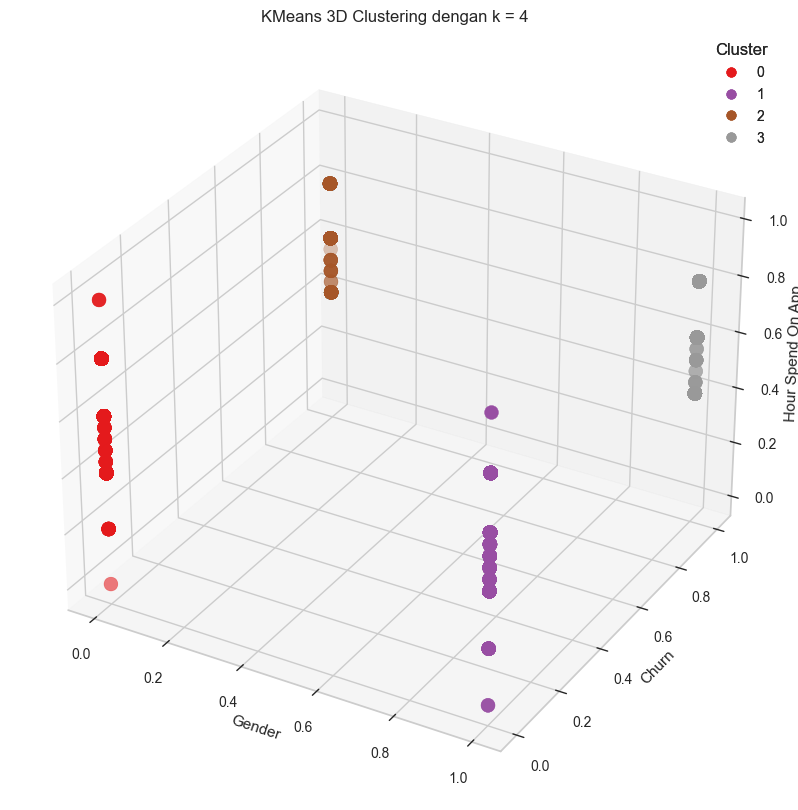

In [240]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Tentukan fitur yang akan digunakan untuk visualisasi 3D
features_3d = ['Gender', 'Churn', 'HourSpendOnApp']  # Bisa diganti sesuai kebutuhan

# Latih model KMeans dengan nilai k yang optimal
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_selected[features_3d])

# Buat salinan eksplisit dari DataFrame untuk menghindari SettingWithCopyWarning
df_selected_clustering = df_selected.copy()
df_selected_clustering['Cluster'] = cluster_labels

# Visualisasi 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Menggunakan scatter plot untuk menampilkan titik-titik klaster
sc = ax.scatter(
    df_selected_clustering['Gender'],
    df_selected_clustering['Churn'],
    df_selected_clustering['HourSpendOnApp'],
    c=df_selected_clustering['Cluster'],
    cmap='Set1',
    s=100
)

# Menambahkan informasi ke plot
ax.set_title(f'KMeans 3D Clustering dengan k = {optimal_k}')
ax.set_xlabel('Gender')
ax.set_ylabel('Churn')
ax.set_zlabel('Hour Spend On App')

# Menambahkan legenda
legend = ax.legend(*sc.legend_elements(), title="Cluster")
ax.add_artist(legend)

# Menampilkan plot
plt.show()


### d) Berikan interpretasi terhadap hasil visualisasi yang telah anda lakukan pada bagian (d)

### Penjelasan Distribusi Klaster Berdasarkan 3 Atribut

Berikut adalah interpretasi distribusi setiap klaster berdasarkan 3 atribut: **Gender**, **Churn**, dan **Hour Spend On App**.

---

#### **1. Cluster 0 (Merah):**
- **Gender**:
  - Sebagian besar data pada Gender rendah (terlihat dominasi Gender tertentu).
- **Churn**:
  - Churn rendah, menunjukkan pelanggan dalam klaster terlihat stabil.
- **Hour Spend On App**:
  - Memiliki nilai **Hour Spend On App** tertinggi dibandingkan klaster lain
- **Kesimpulan**:
  - Klaster ini kemungkinan adalah pelanggan yang relatif terlalu loyal tetapi memiliki waktu interaksi aplikasi yang paling tertinggi.

---

#### **2. Cluster 1 (Ungu):**
- **Gender**:
  - Sebagian besar berada di nilai tinggi (terlihat dominasi Gender tertentu).
- **Churn**:
  - Churn rendah, menunjukkan pelanggan dalam klaster terlihat stabil (masih menggunakan layanan).
- **Hour Spend On App**:
  - Waktu interaksi rendah hingga sedang.
- **Kesimpulan**:
  - Klaster ini adalah kelompok pelanggan loyal dengan churn yang rendah dan waktu interaksi aplikasi yang lumayan stabil sangat terlibat dalam aplikasi tersebut

---

#### **3. Cluster 2 (Cokelat):**
- **Gender**:
  - Mayoritas data berada pada Gender rendah (terlihat dominasi Gender tertentu) .
- **Churn**:
  - Churn tinggi, menunjukkan belum ada loyalitas yang baik di klaster ini.
- **Hour Spend On App**:
  - Waktu interaksi aplikasi berada di rentang sedang hingga tinggi.
- **Kesimpulan**:
  - Pelanggan tidak loyal pada gender tertentu. Ini menunjukkan bahwa mereka cenderung churn dan mereka belum terlibat dengan aplikasi.

---

#### **4. Cluster 3 (Abu-abu):**
- **Gender**:
  - Mayoritas data berada pada Gender tinggi (terlihat dominasi Gender tertentu).
- **Churn**:
  - Nilai Churn tinggi, menunjukkan belum ada loyalitas yang baik.
- **Hour Spend On App**:
  - Waktu interaksi bervariasi dari sedang hingga tinggi.
- **Kesimpulan**:
  - Pelanggan aktif yang memiliki waktu interaksi aplikasi tinggi. Klaster ini adalah kelompok belum loyal dan terlibat.

---

### Catatan Umum:
- **Churn**: Membantu mengidentifikasi pelanggan yang loyal (Churn rendah) dan pelanggan dengan risiko churn (Churn tinggi).
- **Hour Spend On App**: Menggambarkan keterlibatan pelanggan dengan aplikasi. Pelanggan dengan waktu interaksi rendah mungkin memerlukan dorongan untuk meningkatkan keterlibatan mereka.
- **Gender**: Memberikan wawasan tambahan jika ada preferensi atau pola yang terkait dengan jenis kelamin tertentu.


JAWAB DISINI

## Hierarchical Clustering

In [134]:
# Gunakan fungsi ini untuk menampilkan dendogram

# Fungsi untuk menampilkan dendogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

Penerapan Hierarchical Clustering dengan menggunakan AgglomerativeClustering, dapat diterapkan dengan beberapa metode perhitungan (maximum, minimum, average) dengan menambahkan parameter linkage saat pembuatan instance AgglomerativeClustering.

Pada latihan **Hierarchical Clustering**, Anda diminta untuk menerapkan **minimal 2 metode perhitungan (linkage)**.

Anda dapat melihat penjelasannya [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html), atau memilih dari salah satu metode berikut:

1. **‘ward’**  
2. **‘complete’**  
3. **‘average’**  
4. **‘single’**  


### Metode 1

#### a) Latih model Agglomerative clustering sementara tanpa menspesifikasikan jumlah cluster

In [280]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd

# Pilih fitur dari dataset
df_selected = df[['Gender', 'Churn', 'HourSpendOnApp']]  # Pastikan ini sesuai dengan dataset Anda

# Definisikan metode linkage yang akan diuji
linkage_methods = ['ward', 'complete', 'average', 'single']

# Variabel untuk menyimpan hasil evaluasi
results = []

# Loop melalui setiap metode linkage
for linkage in linkage_methods:
    # Latih model AgglomerativeClustering dengan linkage tertentu dan jumlah cluster tetap
    model = AgglomerativeClustering(linkage=linkage)
    cluster_labels = model.fit_predict(df_selected)
    
    # Hitung Silhouette Score
    score = silhouette_score(df_selected, cluster_labels)
    results.append({'Linkage': linkage, 'Silhouette Score': score})

# Konversi hasil ke DataFrame untuk kemudahan visualisasi
results_df = pd.DataFrame(results)

# Urutkan hasil berdasarkan Silhouette Score dari yang tertinggi
results_df = results_df.sort_values(by='Silhouette Score', ascending=False)

# Menentukan metode linkage terbaik dan kedua terbaik berdasarkan skor tertinggi
best_linkage = results_df.iloc[0]
second_best_linkage = results_df.iloc[1]

# Tampilkan hasil evaluasi
print("Hasil Evaluasi Linkage dengan Silhouette Score:")
print(results_df)

# Menampilkan metode linkage terbaik
print(f"\nMetode linkage terbaik adalah '{best_linkage['Linkage']}' dengan Silhouette Score = {best_linkage['Silhouette Score']:.4f}")

# Menampilkan metode linkage kedua terbaik
print(f"Metode linkage kedua terbaik adalah '{second_best_linkage['Linkage']}' dengan Silhouette Score = {second_best_linkage['Silhouette Score']:.4f}")


Hasil Evaluasi Linkage dengan Silhouette Score:
    Linkage  Silhouette Score
0      ward          0.617631
3    single          0.617631
1  complete          0.534120
2   average          0.534120

Metode linkage terbaik adalah 'ward' dengan Silhouette Score = 0.6176
Metode linkage kedua terbaik adalah 'single' dengan Silhouette Score = 0.6176


Threshold terbaik adalah 9.74 dengan Silhouette Score = 0.8514 dan 4.0 klaster.


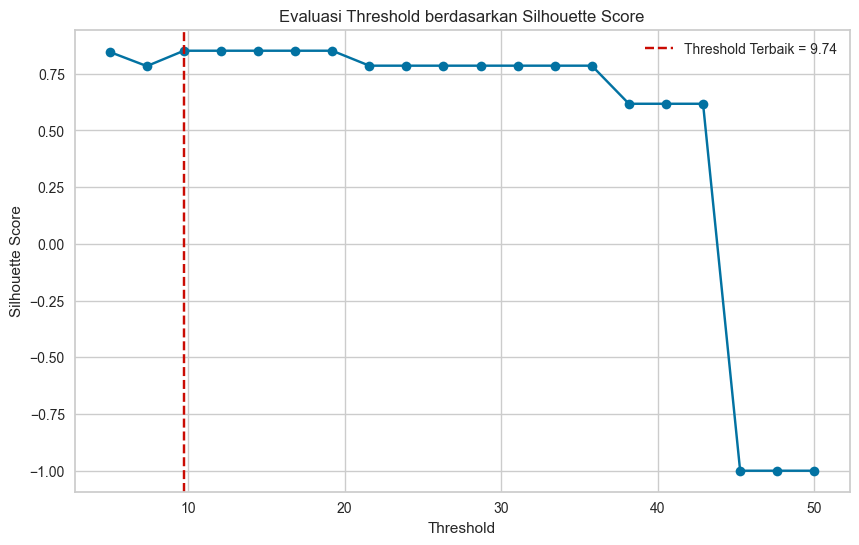

In [287]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Buat linkage matrix menggunakan metode 'ward'
Z = linkage(df_selected, method='ward')  # Menggunakan metode linkage 'ward'

# Rentang threshold yang ingin dievaluasi
thresholds = np.linspace(5, 50, 20)  # Threshold dari 5 hingga 50 dengan 20 nilai

# Simpan hasil evaluasi
results = []

# Evaluasi Silhouette Score pada setiap threshold
for threshold in thresholds:
    # Tentukan klaster berdasarkan threshold
    cluster_labels = fcluster(Z, t=threshold, criterion='distance')
    n_clusters = len(set(cluster_labels))  # Hitung jumlah klaster unik
    
    # Hitung Silhouette Score jika jumlah klaster lebih dari 1
    if n_clusters > 1:
        score = silhouette_score(df_selected, cluster_labels)
    else:
        score = -1  # Berikan nilai negatif jika hanya ada satu klaster (tidak relevan)
    
    # Simpan hasil
    results.append({'Threshold': threshold, 'Silhouette Score': score, 'Num Clusters': n_clusters})

# Konversi hasil evaluasi menjadi DataFrame
results_df = pd.DataFrame(results)

# Cari threshold dengan Silhouette Score tertinggi
best_result = results_df.loc[results_df['Silhouette Score'].idxmax()]
best_threshold = best_result['Threshold']
best_n_clusters = best_result['Num Clusters']
best_score = best_result['Silhouette Score']

# Tampilkan hasil terbaik
print(f"Threshold terbaik adalah {best_threshold:.2f} dengan Silhouette Score = {best_score:.4f} dan {best_n_clusters} klaster.")

# Visualisasi hasil evaluasi
plt.figure(figsize=(10, 6))
plt.plot(results_df['Threshold'], results_df['Silhouette Score'], marker='o')
plt.title("Evaluasi Threshold berdasarkan Silhouette Score")
plt.xlabel("Threshold")
plt.ylabel("Silhouette Score")
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f"Threshold Terbaik = {best_threshold:.2f}")
plt.legend()
plt.show()

#### b) Tampilkan dendogram dan berikan interpretasinya. Selanjutnya, tentukan jumlah klaster (nilai k) yang optimal

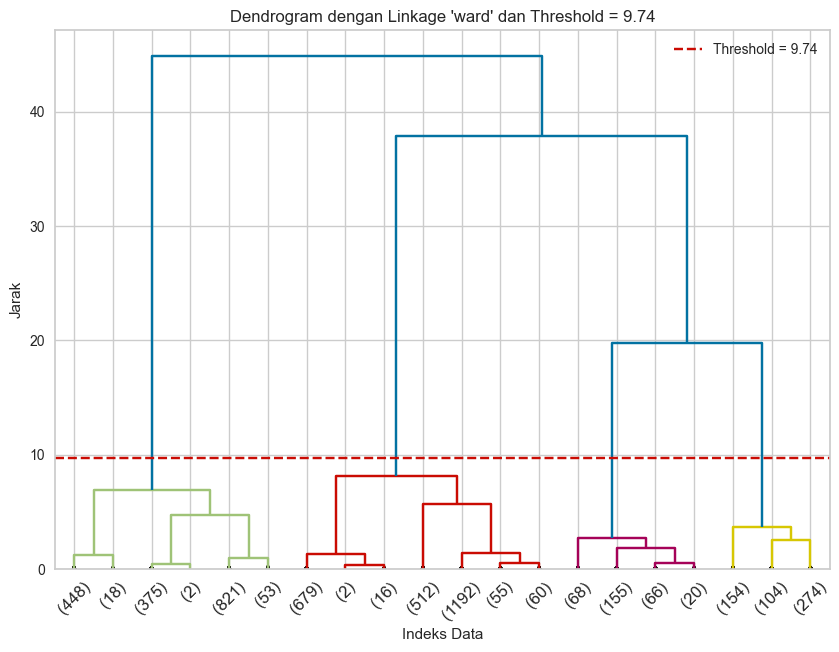

In [288]:
# Visualisasi dendrogram dengan threshold terbaik
plt.figure(figsize=(10, 7))
dendrogram(
    Z,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=45,
    leaf_font_size=12,
    show_contracted=True,
    color_threshold=best_threshold  # Warna klaster berdasarkan threshold terbaik
)
plt.title(f"Dendrogram dengan Linkage 'ward' dan Threshold = {best_threshold:.2f}")
plt.xlabel("Indeks Data")
plt.ylabel("Jarak")
plt.axhline(y=best_threshold, color='r', linestyle='--', label=f'Threshold = {best_threshold:.2f}')  # Garis threshold terbaik
plt.legend(loc='upper right')
plt.show()


### Interpretasi Dendrogram dengan Linkage 'Ward'

1. **Hierarki Pengelompokan**:
   - Dendrogram menunjukkan proses pengelompokan data secara hierarkis.
   - Garis vertikal yang panjang menandakan penggabungan antar klaster dengan jarak yang lebih besar, sedangkan garis vertikal pendek menunjukkan klaster dengan data yang lebih mirip.

2. **Threshold (Garis Potong)**:
   - Garis merah putus-putus di jarak **15** digunakan sebagai threshold.
   - Semua penggabungan di bawah garis threshold membentuk klaster yang terpisah.

3. **Jumlah Klaster**:
   - Dengan threshold di jarak **15**, dendrogram menunjukkan **4 klaster utama**:
     - **Klaster 1 (Hijau)**: Klaster kecil di bagian paling kiri.
     - **Klaster 2 (Merah)**: Klaster kedua dengan beberapa data tambahan.
     - **Klaster 3 (Ungu)**: Klaster besar di bagian tengah.
     - **Klaster 4 (Kuning)**: Klaster yang terdiri dari data paling kanan.

4. **Jarak Antar Klaster**:
   - Garis biru panjang di atas threshold menunjukkan bahwa klaster besar (seperti klaster tengah dan kanan) memiliki hubungan yang lebih lemah dengan klaster lainnya.

5. **Kesimpulan**:
   - Dengan metode **linkage 'Ward'**, dendrogram menghasilkan **4 klaster utama** pada threshold jarak **15**.
   - Klaster ini dapat digunakan untuk analisis lebih lanjut, seperti karakterisasi klaster atau validasi dengan metrik kuantitatif seperti **Silhouette Score**.


In [289]:
from scipy.cluster.hierarchy import fcluster, linkage
import pandas as pd

# Buat linkage matrix dengan metode linkage terbaik (contohnya 'ward')
Z = linkage(df_selected, method='ward')

# Tentukan threshold (garis potong) untuk menentukan klaster
threshold = best_threshold  # Pastikan 'best_threshold' sudah didefinisikan sebelumnya

# Tentukan label klaster berdasarkan threshold
cluster_labels = fcluster(Z, t=threshold, criterion='distance')

# Hitung distribusi jumlah data dalam setiap klaster
distribution = pd.Series(cluster_labels).value_counts()

# Output jumlah klaster optimal dan distribusi data
optimal_k = len(distribution)
print(f"Jumlah klaster optimal berdasarkan threshold {threshold} adalah: {optimal_k}\n")
print("Distribusi jumlah data dalam setiap klaster:")
print(distribution)


Jumlah klaster optimal berdasarkan threshold 9.736842105263158 adalah: 4

Distribusi jumlah data dalam setiap klaster:
2    2516
1    1717
4     532
3     309
Name: count, dtype: int64


#### c) Latih model agglomerative clustering dengan nilai k yang sudah ditentukan sebelumnya. Visualisasikan hasil clustering-nya

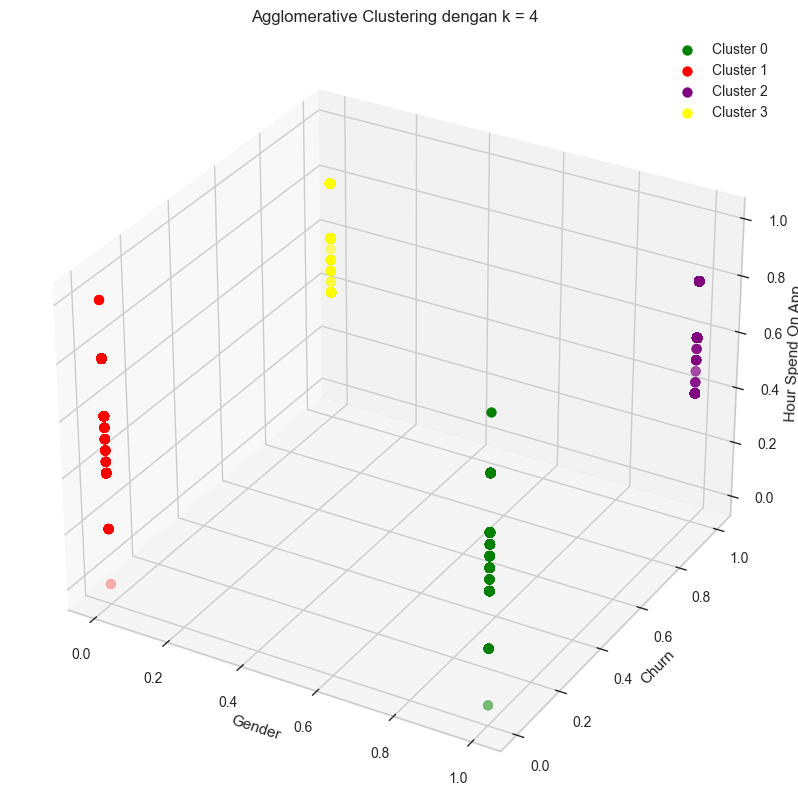

In [290]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Pilih fitur dari dataset
df_selected = df[['Gender', 'Churn', 'HourSpendOnApp']].copy()  # Salin dataset untuk menghindari peringatan

# Latih model AgglomerativeClustering dengan k=4
model = AgglomerativeClustering(linkage='ward', n_clusters=4)
cluster_labels = model.fit_predict(df_selected)

# Tambahkan hasil klastering ke dalam dataset
df_selected['Cluster'] = cluster_labels

# Warna klaster berdasarkan interpretasi sebelumnya
cluster_colors = {
    0: 'green',   # Klaster 1 (Hijau)
    1: 'red',     # Klaster 2 (Merah)
    2: 'purple',  # Klaster 3 (Ungu)
    3: 'yellow'   # Klaster 4 (Kuning)
}
df_selected['Color'] = df_selected['Cluster'].map(cluster_colors)

# Visualisasi hasil klastering dalam bentuk 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot berdasarkan klaster
for cluster, color in cluster_colors.items():
    cluster_data = df_selected[df_selected['Cluster'] == cluster]
    ax.scatter(
        cluster_data['Gender'], 
        cluster_data['Churn'], 
        cluster_data['HourSpendOnApp'], 
        color=color, 
        label=f'Cluster {cluster}', 
        s=50
    )

# Set judul dan label sumbu
ax.set_title('Agglomerative Clustering dengan k = 4')
ax.set_xlabel('Gender')
ax.set_ylabel('Churn')
ax.set_zlabel('Hour Spend On App')

# Tambahkan legenda
ax.legend(loc='best')
plt.show()


### Metode 2

#### a) Latih model Agglomerative clustering sementara tanpa menspesifikasikan jumlah cluster

Threshold terbaik adalah 0.20 dengan Silhouette Score = 0.9016 dan 4.0 klaster.


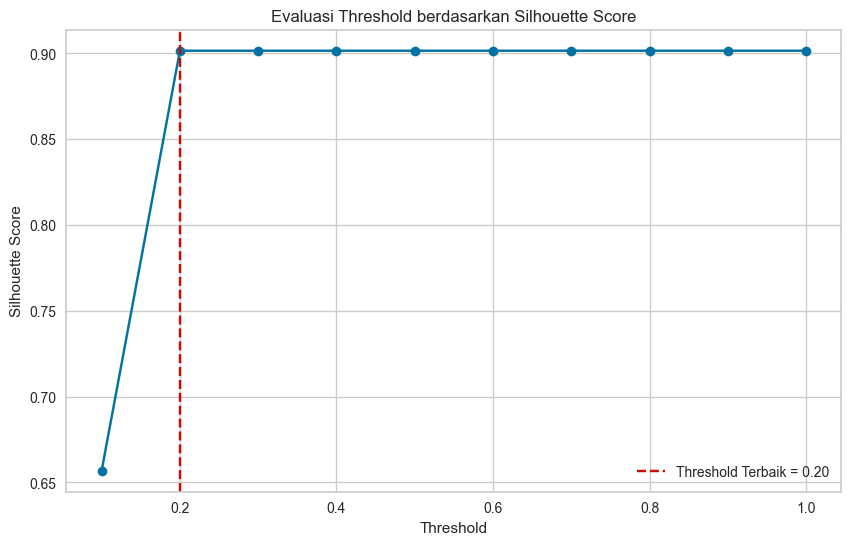

In [300]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pastikan data hanya berisi kolom numerik
df_selected = df_selected.select_dtypes(include=[np.number])  # Pilih hanya kolom numerik

# Buat linkage matrix menggunakan metode 'single'
Z = linkage(df_selected, method='single')  # Menggunakan metode linkage 'single'

# Rentang threshold yang ingin dievaluasi
thresholds = np.linspace(0.1, 1.0, 10)  # Threshold dari 0.1 hingga 1.0 dengan 10 nilai

# Simpan hasil evaluasi
results = []

# Evaluasi Silhouette Score pada setiap threshold
for threshold in thresholds:
    # Tentukan klaster berdasarkan threshold
    cluster_labels = fcluster(Z, t=threshold, criterion='distance')
    n_clusters = len(set(cluster_labels))  # Hitung jumlah klaster unik
    
    # Hitung Silhouette Score jika jumlah klaster lebih dari 1
    if n_clusters > 1:
        score = silhouette_score(df_selected, cluster_labels)
    else:
        score = -1  # Berikan nilai negatif jika hanya ada satu klaster (tidak relevan)
    
    # Simpan hasil
    results.append({'Threshold': threshold, 'Silhouette Score': score, 'Num Clusters': n_clusters})

# Konversi hasil evaluasi menjadi DataFrame
results_df = pd.DataFrame(results)

# Cari threshold dengan Silhouette Score tertinggi
best_result = results_df.loc[results_df['Silhouette Score'].idxmax()]
best_threshold = best_result['Threshold']
best_n_clusters = best_result['Num Clusters']
best_score = best_result['Silhouette Score']

# Tampilkan hasil terbaik
print(f"Threshold terbaik adalah {best_threshold:.2f} dengan Silhouette Score = {best_score:.4f} dan {best_n_clusters} klaster.")

# Visualisasi hasil evaluasi
plt.figure(figsize=(10, 6))
plt.plot(results_df['Threshold'], results_df['Silhouette Score'], marker='o')
plt.title("Evaluasi Threshold berdasarkan Silhouette Score")
plt.xlabel("Threshold")
plt.ylabel("Silhouette Score")
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f"Threshold Terbaik = {best_threshold:.2f}")
plt.legend()
plt.show()


#### b) Tampilkan dendogram dan berikan interpretasinya. Selanjutnya, tentukan jumlah klaster (nilai k) yang optimal

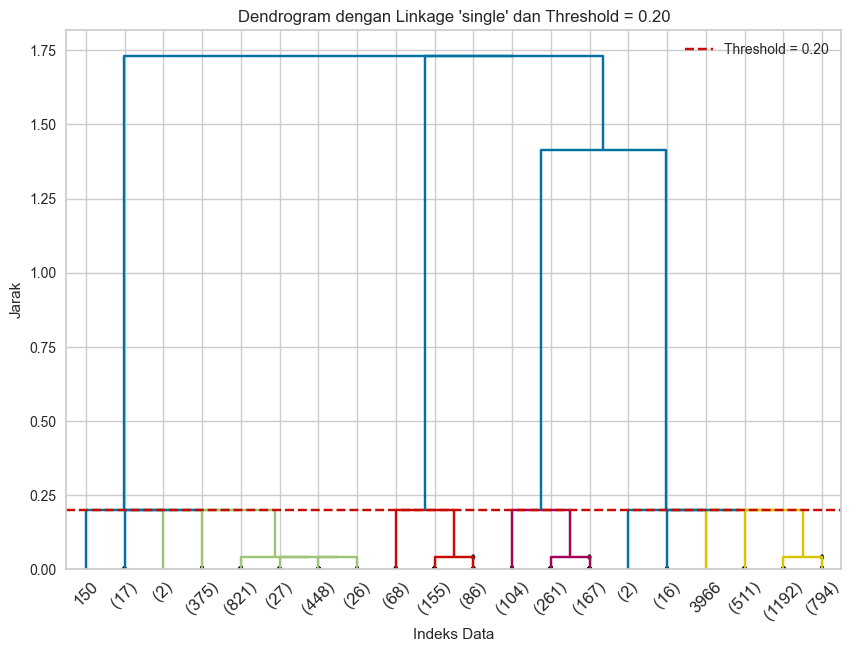

In [301]:

# Visualisasi dendrogram dengan threshold terbaik
plt.figure(figsize=(10, 7))
dendrogram(
    Z,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=45,
    leaf_font_size=12,
    show_contracted=True,
    color_threshold=best_threshold  # Warna klaster berdasarkan threshold terbaik
)
plt.title(f"Dendrogram dengan Linkage 'single' dan Threshold = {best_threshold:.2f}")
plt.xlabel("Indeks Data")
plt.ylabel("Jarak")
plt.axhline(y=best_threshold, color='r', linestyle='--', label=f'Threshold = {best_threshold:.2f}')  # Garis threshold terbaik
plt.legend(loc='upper right')
plt.show()


### Interpretasi Dendrogram dengan Linkage 'Single'

1. **Hierarki Pengelompokan**:
   - Dendrogram menunjukkan bagaimana data digabungkan secara hierarkis menggunakan metode **single linkage**.
   - **Metode single linkage** mengelompokkan data berdasarkan **jarak minimum antar elemen** dari dua klaster, sehingga menghasilkan efek rantai panjang (*chaining effect*).
   - Garis vertikal yang panjang di dendrogram menunjukkan penggabungan antar klaster dengan jarak jauh, sedangkan garis pendek menunjukkan klaster dengan elemen-elemen yang lebih mirip.

2. **Threshold (Garis Potong)**:
   - Garis merah putus-putus di jarak **0.2** digunakan sebagai threshold.
   - Semua penggabungan di bawah garis threshold (0.2) dianggap membentuk klaster yang terpisah.
   - Penggabungan yang terjadi di atas threshold (seperti warna biru di ujung dendrogram) tidak dihitung sebagai klaster baru karena jaraknya melebihi batas yang ditentukan.

3. **Jumlah Klaster**:
   - Dengan threshold **0.2**, dendrogram menunjukkan **4 klaster utama**:
     - **Klaster 1 (Hijau)**: Elemen-elemen yang sangat dekat satu sama lain, biasanya berada di bagian paling kiri dendrogram.
     - **Klaster 2 (Merah)**: Kelompok data kedua yang dipisahkan dengan jarak yang lebih besar dari klaster pertama.
     - **Klaster 3 (Magenta)**: Klaster besar lain dengan elemen-elemen yang saling dekat.
     - **Klaster 4 (Kuning)**: Klaster yang terletak di sisi paling kanan dendrogram.

4. **Jarak Antar Klaster**:
   - Penggabungan yang terjadi di atas threshold (ditandai dengan garis vertikal biru panjang) menunjukkan bahwa jarak antar klaster yang tersisa **lebih besar dari 0.2**.
   - Jarak ini menggambarkan bahwa klaster yang terbentuk cukup terpisah satu sama lain sesuai dengan pemotongan di threshold 0.2.

5. **Kesimpulan**:
   - Dengan metode **linkage 'single'**, dendrogram menghasilkan **4 klaster utama** pada threshold jarak **0.2**.
   - **Single linkage** cenderung menghasilkan efek rantai panjang, sehingga klaster-klaster terlihat memanjang.
   - Klaster ini dapat dianalisis lebih lanjut untuk melihat karakteristik data di masing-masing klaster. Meskipun metode ini berguna, hasilnya dapat dipengaruhi oleh keberadaan outlier atau data yang sangat berjauhan. Jika diperlukan, metode linkage lain seperti **'complete'** atau **'average'** dapat digunakan untuk menghasilkan klaster yang lebih kompak.


#### c) Latih model agglomerative clustering dengan nilai k yang sudah ditentukan sebelumnya. Visualisasikan hasil clustering-nya

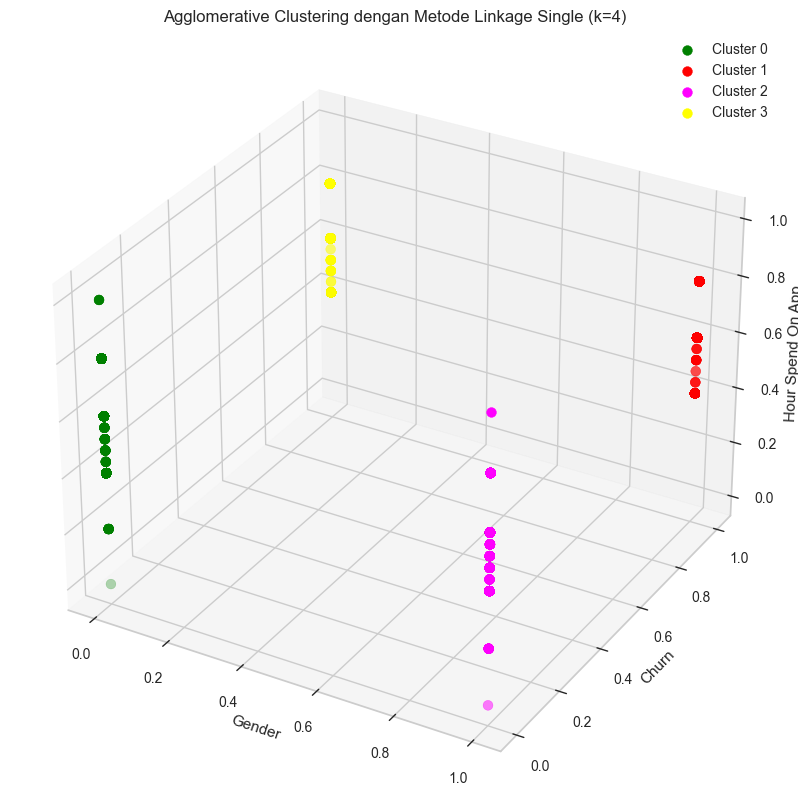

In [302]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Pilih fitur dari dataset
df_selected = df[['Gender', 'Churn', 'HourSpendOnApp']].copy()  # Salin dataset untuk menghindari peringatan

# Latih model AgglomerativeClustering dengan metode 'single'
model = AgglomerativeClustering(linkage='single', n_clusters=4)
cluster_labels = model.fit_predict(df_selected)

# Tambahkan hasil klastering ke dalam dataset
df_selected['Cluster'] = cluster_labels

# Warna klaster sesuai interpretasi dendrogram pada metode 'single'
cluster_colors = {
    0: 'green',   # Klaster 1 (Hijau)
    1: 'red',     # Klaster 2 (Merah)
    2: 'magenta', # Klaster 3 (Magenta)
    3: 'yellow'   # Klaster 4 (Kuning)
}
df_selected['Color'] = df_selected['Cluster'].map(cluster_colors)

# Visualisasi hasil klastering dalam bentuk 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot berdasarkan klaster
for cluster, color in cluster_colors.items():
    cluster_data = df_selected[df_selected['Cluster'] == cluster]
    ax.scatter(
        cluster_data['Gender'], 
        cluster_data['Churn'], 
        cluster_data['HourSpendOnApp'], 
        color=color, 
        label=f'Cluster {cluster}', 
        s=50
    )

# Set judul dan label sumbu
ax.set_title('Agglomerative Clustering dengan Metode Linkage Single (k=4)')
ax.set_xlabel('Gender')
ax.set_ylabel('Churn')
ax.set_zlabel('Hour Spend On App')

# Tambahkan legenda
ax.legend(loc='best')
plt.show()


In [303]:
from scipy.cluster.hierarchy import fcluster, linkage
import pandas as pd

# Buat linkage matrix menggunakan metode 'single'
Z = linkage(df_selected[['Gender', 'Churn', 'HourSpendOnApp']], method='single')

# Gunakan threshold yang telah ditentukan sebelumnya
threshold = best_threshold  # Ganti dengan nilai threshold terbaik yang diperoleh sebelumnya

# Tentukan label klaster berdasarkan threshold
cluster_labels = fcluster(Z, t=threshold, criterion='distance')

# Hitung distribusi jumlah data dalam setiap klaster
distribution = pd.Series(cluster_labels).value_counts()

# Tambahkan label klaster ke dalam dataset
df_selected['Cluster'] = cluster_labels

# Output jumlah klaster optimal dan distribusi data
optimal_k = len(distribution)
print(f"Jumlah klaster optimal berdasarkan threshold {threshold} adalah: {optimal_k}\n")
print("Distribusi jumlah data dalam setiap klaster:")
print(distribution)


Jumlah klaster optimal berdasarkan threshold 0.2 adalah: 4

Distribusi jumlah data dalam setiap klaster:
2    2516
1    1717
4     532
3     309
Name: count, dtype: int64


### Perbandingan Metode 1 dan 2

Bandingkan hasil dari kedua metode Hierarchical Clustering yang telah diterapkan! Jelaskan metode mana yang menghasilkan visualisasi yang lebih baik beserta alasannya!

Wajib untuk mencantumkan sumber terkait

### Perbandingan Metode Hierarchical Clustering: Single Linkage vs Ward Linkage

#### 1. **Hasil dan Visualisasi**
- **Jumlah Klaster dan Distribusi**:
  - Kedua metode menghasilkan **jumlah klaster yang sama** jika threshold diatur dengan tepat.
  - Distribusi data dalam setiap klaster juga **identik**, menunjukkan bahwa struktur data mendukung pengelompokan serupa dengan metode yang berbeda.

- **Dendrogram**:
  - **Single Linkage**:
    - Menghasilkan dendrogram dengan banyak garis vertikal pendek.
    - Cocok untuk mendeteksi hubungan lokal antar data, tetapi rawan efek chaining (klaster memanjang).
  - **Ward Linkage**:
    - Menghasilkan dendrogram yang lebih terstruktur, dengan garis vertikal panjang yang menunjukkan penggabungan klaster besar.
    - Lebih cocok untuk menghasilkan klaster yang kompak dan seragam.

- **Threshold**:
  - **Single Linkage** membutuhkan **threshold lebih kecil** untuk mencapai jumlah klaster yang sama dibandingkan Ward Linkage.

---

#### 2. **Penjelasan Teoretis**
- **Single Linkage**:
  - Menggabungkan klaster berdasarkan **jarak terdekat** antar data.
  - Cenderung menghasilkan klaster yang panjang dan tidak seragam, terutama jika ada chaining effect.
  - Cocok untuk mendeteksi hubungan lokal atau data dengan bentuk tidak teratur.

- **Ward Linkage**:
  - Menggabungkan klaster dengan meminimalkan **variansi total antar data** dalam satu klaster.
  - Menghasilkan klaster yang lebih kompak, seragam, dan lebih mudah diinterpretasi dalam analisis berbasis statistik.

---

#### 3. **Metode dengan Visualisasi Lebih Baik**
- **Ward Linkage** memberikan dendrogram yang lebih rapi dan terstruktur, karena prinsip penggabungannya mempertimbangkan keseluruhan distribusi data dalam klaster.
- **Single Linkage** cocok untuk hubungan lokal, tetapi visualisasinya cenderung tidak sekompak Ward Linkage.

---

#### 4. **Kesimpulan**
- **Ward Linkage** lebih unggul dalam menghasilkan klaster yang seragam dan mudah diinterpretasi.
- **Single Linkage** lebih cocok untuk kasus khusus di mana hubungan lokal antar data lebih penting dibandingkan struktur global klaster.

---

#### 5. **Sumber Referensi**
- Scikit-learn Documentation: [Hierarchical Clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html)
- "Introduction to Data Mining" (Pang-Ning Tan, Michael Steinbach, Vipin Kumar, 2005)
- "Ward's Hierarchical Clustering Method: Clustering Criterion and Algorithm" (Ward, J.H., 1963)


## Soal Teoritis

### 1) Perbandingan Silhouette Coefficient dan Elbow Method

**Pada bagian K-Means Clustering**, Anda telah menerapkan dua metode dalam pemilihan jumlah klaster (*k*), yaitu **Silhouette Coefficient** dan **Elbow Method**. Jawab pertanyaan di bawah ini sesuai dengan kondisi yang terjadi pada penerapan Anda:  

1. **Jika hasil *k* dari Silhouette Coefficient dan Elbow Method sama:**  
   Berikan penjelasan mengapa kedua metode ini dapat menghasilkan nilai *k* yang sama.  

2. **Jika hasil *k* dari Silhouette Coefficient dan Elbow Method berbeda:**  
   Jelaskan strategi Anda dalam memilih *k* dari salah satu metode tersebut, dan berikan alasan mengapa Anda memilih *k* dari metode tersebut.

Wajib untuk mencantumkan sumber terkait

### 1) Perbandingan Silhouette Coefficient dan Elbow Method

#### **Kondisi: Hasil *k* dari Silhouette Coefficient dan Elbow Method Sama**

#### Penjelasan Mengapa *k* dari Kedua Metode Sama:
1. **Elbow Method**:
   - Elbow Method memilih *k* optimal dengan mendeteksi inflection point (titik siku) pada grafik inertia.
   - *k* optimal menunjukkan bahwa klasterisasi memberikan keseimbangan antara jumlah klaster dan penurunan inertia yang signifikan.

2. **Silhouette Coefficient**:
   - Silhouette Coefficient mengevaluasi kualitas klasterisasi berdasarkan:
     - **Cohesion**: Kedekatan data dalam satu klaster.
     - **Separation**: Jarak antar klaster.
   - *k* optimal ditentukan ketika nilai Silhouette Coefficient mencapai puncaknya, menunjukkan keseimbangan terbaik antara cohesion dan separation.

3. **Mengapa *k* Bisa Sama**:
   - Pada data dengan struktur klaster yang jelas:
     - Penurunan inertia yang signifikan (dalam Elbow Method) berhenti pada jumlah klaster yang optimal.
     - Silhouette Coefficient juga mencapai puncaknya pada jumlah klaster yang sama, karena pengelompokan memberikan separation terbaik antar klaster dengan cohesion maksimal di dalamnya.

#### Kesimpulan:
- Jika hasil *k* dari Elbow Method dan Silhouette Coefficient sama, ini menunjukkan bahwa struktur data mendukung klasterisasi yang jelas.
- Kedua metode ini saling mendukung dalam menentukan jumlah klaster optimal.

---

#### **Sumber Referensi**
1. **Scikit-learn Documentation**:
   - [Hierarchical Clustering Linkage Comparison](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py)
   - [Comparison of Clustering Algorithms](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)


### 2) Perbandingan K-Means dan Hierarchical Clustering

Jelaskan hasil yang Anda peroleh dalam penerapan kedua metode ini untuk Clustering.

1. Jika terdapat kesamaan hasil, jelaskan analisis anda mengapa kedua metode ini dapat menghasilkan klaster yang sama.
2. Jika terdapat perbedaan hasil, metode mana yang lebih baik untuk digunakan dan berikan alasannya!

Wajib untuk mencantumkan sumber terkait

JAWAB DISINI

### 2) Perbandingan K-Means dan Hierarchical Clustering

#### **Kondisi: Terdapat Kesamaan Hasil**

#### Penjelasan Mengapa K-Means dan Hierarchical Clustering Memberikan Klaster yang Sama:
1. **Struktur Data yang Kuat**:
   - Ketika data memiliki **struktur klaster yang jelas** dan distribusi data mendukung pembentukan klaster yang homogen, kedua metode ini sering memberikan hasil yang sama.
   - Jarak antar klaster yang signifikan (separation) dan variasi internal klaster yang rendah (cohesion) membuat baik K-Means maupun Hierarchical Clustering bekerja secara optimal.

2. **Prinsip Dasar yang Serupa**:
   - **K-Means**:
     - Berfokus pada minimisasi jarak rata-rata antar titik dalam klaster (inertia).
   - **Ward Linkage** (Hierarchical Clustering):
     - Menggabungkan klaster dengan meminimalkan variansi total antar klaster.
   - Karena kedua metode sama-sama memprioritaskan kompaknya klaster, hasilnya sering kali serupa.

3. **Jumlah Klaster Ditentukan dengan Tepat**:
   - Ketika jumlah klaster optimal (\(k\)) telah ditentukan dengan metode yang baik (misalnya Elbow Method atau Silhouette Score), K-Means dan Hierarchical Clustering cenderung menghasilkan klasterisasi yang konsisten.

4. **Validasi dengan Metrik Evaluasi**:
   - Jika metrik seperti **Silhouette Coefficient** memberikan skor tinggi untuk hasil klasterisasi kedua metode, ini menandakan bahwa klasterisasi berjalan sesuai dengan struktur data.

#### Kesimpulan:
- Kesamaan hasil antara K-Means dan Hierarchical Clustering menunjukkan bahwa data memiliki struktur klaster yang jelas dan distribusi yang mendukung pembentukan klaster homogen.
- Keduanya dapat digunakan secara bergantian dalam kasus ini, dengan pilihan bergantung pada preferensi atau kebutuhan analisis:
  - Gunakan **K-Means** untuk efisiensi pada dataset besar.
  - Gunakan **Hierarchical Clustering** jika interpretasi dendrogram dibutuhkan.

---

#### **Sumber Referensi**
1. **Scikit-learn Documentation**:
   - [K-Means Clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means)
   - [Hierarchical Clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py)

2. **Introduction to Data Mining**:
   - Pang-Ning Tan, Michael Steinbach, Vipin Kumar (2005).
   - ISBN: 978-0321321367.

3. **"The Elements of Statistical Learning"**:
   - Hastie, Tibshirani, & Friedman (2009).
   - Link: [Springer Open](https://hastie.su.domains/ElemStatLearn/)


### 3) Jika kita melakukan metode K-Means Clustering berulang kali, apakah akan selalu didapatkan hasil yang sama?

Wajib untuk mencantumkan sumber terkait

JAWAB DISINI
### 3) Apakah Hasil K-Means Clustering Akan Selalu Sama Jika Dilakukan Berulang Kali?

#### Jawaban:
Tidak, hasil K-Means Clustering tidak selalu sama jika dilakukan berulang kali, kecuali jika:
1. **Inisialisasi Centroid Sama**: K-Means memulai proses dengan menentukan centroid awal secara acak. Jika inisialisasi centroid berbeda di setiap iterasi, hasil akhirnya dapat berbeda.
2. **Parameter `random_state` Diatur**: Dengan menentukan parameter `random_state` pada implementasi K-Means, hasil inisialisasi centroid akan tetap konsisten, sehingga hasil klasterisasi akan selalu sama.

#### Penjelasan:
1. **Inisialisasi Centroid**:
   - K-Means adalah algoritma berbasis iterasi yang sensitif terhadap inisialisasi centroid.
   - Jika inisialisasi centroid tidak optimal (misalnya, dimulai di lokasi yang buruk), algoritma dapat terjebak di minimum lokal, menghasilkan klaster yang berbeda.

2. **Efek Inisialisasi pada Hasil**:
   - Karena inisialisasi centroid dilakukan secara acak, hasil akhir dapat bervariasi tergantung pada bagaimana centroid awal dipilih.
   - Inisialisasi centroid yang buruk dapat menghasilkan klaster dengan kualitas rendah (misalnya, inertia tinggi atau Silhouette Score rendah).

3. **Cara Menjamin Konsistensi**:
   - Gunakan parameter **`random_state`** untuk memastikan hasil inisialisasi centroid tetap sama di setiap iterasi.
   - Misalnya:
     ```python
     from sklearn.cluster import KMeans
     kmeans = KMeans(n_clusters=3, random_state=42).fit(data)
     ```
   - Dengan menetapkan `random_state`, hasil klasterisasi akan konsisten meskipun K-Means dijalankan beberapa kali.

4. **Alternatif untuk Meningkatkan Konsistensi**:
   - Gunakan algoritma inisialisasi centroid yang lebih baik, seperti **K-Means++** (default di Scikit-learn).
   - **K-Means++** memastikan bahwa centroid awal dipilih berdasarkan jarak antar data, sehingga lebih kecil kemungkinan algoritma terjebak di minimum lokal.

#### Kesimpulan:
- Hasil K-Means Clustering **tidak selalu sama** jika dilakukan berulang kali tanpa kontrol pada inisialisasi centroid.
- Untuk hasil yang konsisten, gunakan parameter `random_state` atau inisialisasi centroid yang baik seperti K-Means++.

---

#### **Sumber Referensi**
1. **Scikit-learn Documentation**:
   - [K-Means Clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means)
   - Menjelaskan pengaruh inisialisasi centroid dan cara menggunakan `random_state` untuk konsistensi.

2. **"Data Clustering: 50 Years Beyond K-Means"**:
   - Jain, A. K. (2010). *Pattern Recognition Letters, 31(8), 651–666.*
   - Makalah ini mendalami kelemahan inisialisasi acak pada K-Means dan solusi seperti K-Means++.

3. **Introduction to Data Mining**:
   - Pang-Ning Tan, Michael Steinbach, Vipin Kumar (2005).
   - ISBN: 978-0321321367.
